falta ajustar os textos, incluir insights e resumo executivo inicial além do README do proojet completo com questao 1 e 2

# Desafio Data Science - Meli

Autor: Lucas Porto

## Explore ofertas relámpago. Que insights você pode gerar?

### Descrição
Em conjunto com o desafio compartilhamos um arquivo chamado "relampago_relampago.csv" que contém informações sobre os resultados de ofertas do tipo relâmpago para um período de tempo e um país específico.

Ou seja, são ofertas que têm duração definida de algumas horas e um percentual de unidades (estoque) comprometidas.
O objetivo deste desafio é fazer uma EDA sobre estes dados procurando insights sobre este tipo de ofertas.
As colunas do conjunto de dados são autoexplicativas, mas você pode nos fazer qualquer pergunta.

### Entregável 
O resultado deste desafio é um notebook Jupyter com EDA.

## Resumo do Projeto

### Contexto e Métricas Gerais
Foram analisadas **48.746 ofertas relâmpago**, distribuídas em **9 verticais** e mais de **1.200 domínios**, no período de **junho a julho de 2021**.
As ofertas tiveram **duração média de 5,7 horas**, resultando em uma **receita total de aproximadamente R$ 1,26 milhão**.
A **taxa média de venda** foi de **20,7%**, com **GMV médio de R$ 51,21 por oferta**.

### Distribuição de Performance
A análise identificou três grupos principais de comportamento:
- **49,6%** das ofertas não registraram vendas.
- **42,9%** alcançaram vendas parciais (até o limite do estoque).
- **7,5%** apresentaram **overselling**, com vendas acima do estoque disponível.

Esses resultados evidenciam **alta dispersão de performance**, com oportunidades de otimização na precificação, no dimensionamento de estoque e na duração das campanhas.

### Performance por Vertical

#### Beauty & Health (Líder em Receita)
- **Receita Total:** R$ 547.427 (43,5% do total)
- **Taxa de Esgotamento:** 11,4%
- **Preço Médio Unitário:** R$ 3,07
- **Eficiência:** R$ 21,46 por hora

Combina alto volume de vendas com boa eficiência operacional, consolidando-se como o principal vetor de receita do período.

#### Consumer Electronics (CE)
- **Receita Total:** R$ 362.788
- **Preço Médio Unitário:** R$ 16,62
- **Alta concentração:** 83% da receita proveniente de apenas 10% das ofertas

Apesar do alto valor unitário, há **forte concentração** nas ofertas de maior destaque, indicando potencial de diversificação e ampliação do portfólio rentável.

#### Home & Industry
- **Maior volume de ofertas:** 11.011
- **Receita Total:** R$ 155.519
- **Preço Médio Unitário:** R$ 5,11

Representa a vertical com maior número de campanhas, mas ainda com margem para aprimorar eficiência e seleção de produtos.

### Análise Temporal

#### Desempenho por Dia da Semana
- **Melhores dias:** Terça e quinta-feira (8,3% das ofertas esgotadas)
- **Pior desempenho:** Sábado (53,4% das ofertas sem vendas)

Observa-se maior engajamento nas ofertas de meio de semana e queda expressiva durante o fim de semana.

#### Desempenho por Faixa Horária
- **Noite (19h–1h):** Maior taxa de venda (23,7%)
- **Tarde (13h–19h):** Maior receita (R$ 772.360) e volume (20.910 ofertas)
- **Madrugada (1h–7h):** Preços mais altos (R$ 57,46/unidade), porém com baixa conversão

O horário noturno combina o melhor equilíbrio entre volume e conversão, enquanto o período da tarde maximiza o faturamento bruto.

### Impacto do Frete Grátis
O **frete grátis** demonstrou impacto positivo em diversas dimensões:
- Maior **GMV por unidade de estoque** na maioria das categorias.
- Melhor desempenho em **ofertas de duração média (2–6 horas)**.
- Efeito mais pronunciado em **Consumer Electronics**, **Beauty & Health** e **Home & Industry**.

Esses resultados indicam que o frete gratuito é mais eficiente quando combinado com campanhas curtas e produtos de alta recorrência.

### Análise de Concentração (Princípio de Pareto)
- **Consumer Electronics:** 83% da receita concentrada em 10% das ofertas.
- **Beauty & Health:** 77% da receita concentrada em 10% das ofertas.
- **App & Sports:** Distribuição mais equilibrada (61% da receita nos 10% principais).

A concentração reforça a importância de estratégias segmentadas, priorizando produtos de alta performance e ajustando a alocação de estoque nas categorias de maior dispersão.

### Conclusão
O portfólio de ofertas relâmpago apresenta **forte assimetria de performance** entre verticais e horários.
Há **potencial expressivo de otimização** nas dimensões de preço, estoque e calendário.
As verticais **Beauty & Health** e **Consumer Electronics** mostraram maior retorno marginal e devem ser priorizadas nas próximas estratégias, especialmente em campanhas **noturnas de 2 a 6 horas com frete grátis**.

# Imports

In [1]:
import pandas as pd

In [2]:
from utils.analytics_utils import (
    carregar_dados,
    criar_features,
    obter_colunas_por_tipo,
    analise_outliers,
    analise_distribuicoes_graficos,
    analise_boxplots_graficos,
    grafico_correlacao_numericas,
    exibir_pares_correlacionados,
    analise_completa_por_vertical,
    analise_temporal_por_vertical,
    analisar_categoria_performance,
    graficos_distribuicao_categoricas,
    analise_evolutiva_temporal,
    analise_correlacoes_heatmaps,
    analise_duracao_receita,
    analise_tempo_ate_esgotar,
    analise_pareto_gmv,
    comparacao_frete_controlada,
    kpi_resumo,
    kpi_resumo_2d,
)

# Carregar os Dados

In [42]:
df.SOLD_AMOUNT.sum() / df.shape[0]

np.float64(25.820857095966847)

In [3]:
df = carregar_dados("data/ofertas_relampago.csv")

Carregando dados...
Dados carregados com sucesso! Shape: (48746, 13)


# EDA

## Entendendo os dados

In [4]:
print(f"Dimensões do dataset:")
print(f"   - Linhas: {df.shape[0]:,}")
print(f"   - Colunas: {df.shape[1]}")

print(f"\nColunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

Dimensões do dataset:
   - Linhas: 48,746
   - Colunas: 13

Colunas disponíveis:
    1. OFFER_START_DATE
    2. OFFER_START_DTTM
    3. OFFER_FINISH_DTTM
    4. OFFER_TYPE
    5. INVOLVED_STOCK
    6. REMAINING_STOCK_AFTER_END
    7. SOLD_AMOUNT
    8. SOLD_QUANTITY
    9. ORIGIN
   10. SHIPPING_PAYMENT_TYPE
   11. DOM_DOMAIN_AGG1
   12. VERTICAL
   13. DOMAIN_ID


In [5]:
print(f"Primeiras 5 linhas:")
df.head()

Primeiras 5 linhas:


OFFER_START_DATE           OFFER_START_DTTM          OFFER_FINISH_DTTM  \
0       2021-06-22  2021-06-22 16:00:00+00:00  2021-06-22 23:02:43+00:00   
1       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 19:00:02+00:00   
2       2021-06-22  2021-06-22 07:00:00+00:00  2021-06-22 13:00:01+00:00   
3       2021-06-22  2021-06-22 19:00:00+00:00  2021-06-23 01:36:12+00:00   
4       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 15:48:12+00:00   

       OFFER_TYPE  INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  \
0  lightning_deal               4                         -2         4.72   
1  lightning_deal               5                          5          NaN   
2  lightning_deal              15                         12        10.73   
3  lightning_deal              15                         13         7.03   
4  lightning_deal              15                          0        39.65   

   SOLD_QUANTITY ORIGIN SHIPPING_PAYMENT_TYPE DOM_DOMAIN_AGG1 VERTICAL  \
0            6.0      A                  none       PETS FOOD      CPG   
1            NaN    NaN         free_shipping    PET PRODUCTS   OTHERS   
2            3.0    NaN                  none       COMPUTERS       CE   
3            2.0    NaN                  none       COMPUTERS       CE   
4           15.0    NaN                  none       COMPUTERS       CE   

                     DOMAIN_ID  
0               MLM-BIRD_FOODS  
1  MLM-ANIMAL_AND_PET_PRODUCTS  
2                 MLM-SPEAKERS  
3               MLM-HEADPHONES  
4               MLM-HEADPHONES

In [6]:
print(f"Informações sobre tipos de dados:")
print(df.dtypes)

Informações sobre tipos de dados:
OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object


In [7]:
print(f"Estatísticas descritivas:")
df.describe(include='all')

Estatísticas descritivas:


OFFER_START_DATE           OFFER_START_DTTM          OFFER_FINISH_DTTM  \
count             48746                      48746                      48746   
unique               61                        783                       7578   
top          2021-07-30  2021-07-30 13:00:00+00:00  2021-07-06 13:00:01+00:00   
freq               1300                        414                         77   
mean                NaN                        NaN                        NaN   
std                 NaN                        NaN                        NaN   
min                 NaN                        NaN                        NaN   
25%                 NaN                        NaN                        NaN   
50%                 NaN                        NaN                        NaN   
75%                 NaN                        NaN                        NaN   
max                 NaN                        NaN                        NaN   

            OFFER_TYPE  INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  \
count            48746    48746.000000               48746.000000   
unique               1             NaN                        NaN   
top     lightning_deal             NaN                        NaN   
freq             48746             NaN                        NaN   
mean               NaN       35.007508                  30.565216   
std                NaN      206.761058                 195.813806   
min                NaN        1.000000                -192.000000   
25%                NaN        5.000000                   4.000000   
50%                NaN       10.000000                   8.000000   
75%                NaN       15.000000                  15.000000   
max                NaN     9000.000000                8635.000000   

         SOLD_AMOUNT  SOLD_QUANTITY ORIGIN SHIPPING_PAYMENT_TYPE  \
count   24579.000000   24579.000000  11316                 48746   
unique           NaN            NaN      1                     2   
top              NaN            NaN      A         free_shipping   
freq             NaN            NaN  11316                 26658   
mean       51.208898      10.851052    NaN                   NaN   
std       175.254414      45.475305    NaN                   NaN   
min         0.280000       1.000000    NaN                   NaN   
25%         5.730000       1.000000    NaN                   NaN   
50%        12.420000       3.000000    NaN                   NaN   
75%        30.925000       6.000000    NaN                   NaN   
max      4836.570000    1646.000000    NaN                   NaN   

       DOM_DOMAIN_AGG1      VERTICAL                          DOMAIN_ID  
count            48746         48746                              48746  
unique              36             9                               1266  
top         HOME&DECOR  APP & SPORTS  MLM-SURGICAL_AND_INDUSTRIAL_MASKS  
freq              6742         13241                               1759  
mean               NaN           NaN                                NaN  
std                NaN           NaN                                NaN  
min                NaN           NaN                                NaN  
25%                NaN           NaN                                NaN  
50%                NaN           NaN                                NaN  
75%                NaN           NaN                                NaN  
max                NaN           NaN                                NaN

Podemos já começar a conhecer nosso dataframe:

- OFFER_START_DATE: object -> Data da oferta: mudar para tipo data
- OFFER_START_DTTM: object -> Data com hora e minuto do início da oferta: mudar para tipo datetime com timestamp
- OFFER_FINISH_DTTM: object -> Data com hora e minuto do final da oferta: mudar para tipo datetime com timestamp
- OFFER_TYPE: object -> Tipo da Oferta
- INVOLVED_STOCK: int64 -> Estoque disponível para a oferta
- REMAINING_STOCK_AFTER_END: int64 -> Estoque após a oferta: pode ser negativo, já que a quantidade vendida pode acabar sendo maior que a existente (provavelmente gere custos)
- SOLD_AMOUNT: float64 -> Quantidade vendida monetariamente
- SOLD_QUANTITY: float64 -> Quantidade vendia em unidades
- ORIGIN: object -> Não entendi esta coluna 100%
- SHIPPING_PAYMENT_TYPE: object -> Frete Grátis ou não
- DOM_DOMAIN_AGG1: object -> Área do produto
- VERTICAL      : object -> Departamento
- DOMAIN_ID: object -> Id da área de produto

## Conversão de Tipos de Dados e Limpeza


### Verificação dos nulos

In [8]:
nulos_por_coluna = df.isnull().sum()
percentual_nulos = (nulos_por_coluna / len(df)) * 100

print(f"Valores nulos por coluna:")
df_nulos = pd.DataFrame({
    'Coluna': nulos_por_coluna.index,
    'Quantidade_Nulos': nulos_por_coluna.values,
    'Percentual_Nulos': percentual_nulos.values
}).sort_values('Quantidade_Nulos', ascending=False)

df_nulos

Valores nulos por coluna:


Coluna  Quantidade_Nulos  Percentual_Nulos
8                      ORIGIN             37430         76.785788
6                 SOLD_AMOUNT             24167         49.577401
7               SOLD_QUANTITY             24167         49.577401
1            OFFER_START_DTTM                 0          0.000000
0            OFFER_START_DATE                 0          0.000000
4              INVOLVED_STOCK                 0          0.000000
3                  OFFER_TYPE                 0          0.000000
2           OFFER_FINISH_DTTM                 0          0.000000
5   REMAINING_STOCK_AFTER_END                 0          0.000000
9       SHIPPING_PAYMENT_TYPE                 0          0.000000
10            DOM_DOMAIN_AGG1                 0          0.000000
11                   VERTICAL                 0          0.000000
12                  DOMAIN_ID                 0          0.000000

Podemos ver que temos 3 colunas com valores nulos:
- Origin: quase incompleta
- SOLD_AMOUT e SOLD_QUANTITY: quase metade dos dados faltantes, o que pode apontar que nem todos os produtos venderam durante a oferta.

In [9]:
print(f"Padrões de valores faltantes:")
missing_patterns = df.isnull().sum(axis=1)
print(f"   - Linhas sem nulos: {(missing_patterns == 0).sum():,}")
print(f"   - Linhas com 1 nulo: {(missing_patterns == 1).sum():,}")
print(f"   - Linhas com 2 nulo: {(missing_patterns == 2).sum():,}")
print(f"   - Linhas com 3 nulo: {(missing_patterns == 3).sum():,}")

Padrões de valores faltantes:
   - Linhas sem nulos: 5,208
   - Linhas com 1 nulo: 19,371
   - Linhas com 2 nulo: 6,108
   - Linhas com 3 nulo: 18,059


## Ajuste dos tipos de dados

In [10]:
df_tratado = criar_features(df)


## Ajuste dos tipos de dados
   Encontrados 1,273 valores negativos em REMAINING_STOCK_AFTER_END
   Estes valores indicam overselling (vendas além do estoque disponível)

## Criando features temporais

## Criando features de vendas

## Criando features de preço

## Criando features de potencial

## Criando features de overselling

## Criando KPIs de qualidade e consistência

Feature engineering completo!
   Total de features criadas: 20


In [11]:
colunas = obter_colunas_por_tipo()


## Análises Estatísticas

In [12]:
print(f"\nEstatisticas descritivas:")
df_tratado[colunas['todas_numericas']].describe()


Estatisticas descritivas:


INVOLVED_STOCK  REMAINING_STOCK_AFTER_END   SOLD_AMOUNT  SOLD_QUANTITY  \
count    48746.000000               48746.000000  24579.000000   24579.000000   
mean        35.007508                  30.565216     51.208898      10.851052   
std        206.761058                 195.813806    175.254414      45.475305   
min          1.000000                -192.000000      0.280000       1.000000   
25%          5.000000                   4.000000      5.730000       1.000000   
50%         10.000000                   8.000000     12.420000       3.000000   
75%         15.000000                  15.000000     30.925000       6.000000   
max       9000.000000                8635.000000   4836.570000    1646.000000   

       DURATION_HOURS    START_HOUR       WEEKDAY       WEEKEND    STOCK_SOLD  \
count    48746.000000  48746.000000  48746.000000  48746.000000  48746.000000   
mean         5.708344     13.178722      3.000082      0.273663      4.442293   
std          2.113096      4.511976      1.937965      0.445843     24.212081   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          6.000000      7.000000      1.000000      0.000000      0.000000   
50%          6.000556     13.000000      3.000000      0.000000      1.000000   
75%          6.004444     19.000000      5.000000      1.000000      3.000000   
max        104.752500     23.000000      6.000000      1.000000   1642.000000   

         SALES_RATE  ...  POTENTIAL_VALUE  SALES_EFFICIENCY  \
count  48746.000000  ...     48746.000000      48746.000000   
mean       0.206735  ...       216.468757          0.206735   
std        0.353204  ...      1916.282791          0.353204   
min        0.000000  ...         0.000000          0.000000   
25%        0.000000  ...         0.000000          0.000000   
50%        0.010000  ...         3.950000          0.010000   
75%        0.250000  ...        44.965625          0.250000   
max       13.800000  ...    127298.805970         13.800000   

       OVERSELLING_MARGIN  OVERSELL_FLAG  OVERSELL_UNITS  STOCKOUT_FLAG  \
count        48746.000000   48746.000000    48746.000000   48746.000000   
mean             0.078304       0.026115        0.078304       0.087433   
std              1.250329       0.159479        1.250329       0.282471   
min              0.000000       0.000000        0.000000       0.000000   
25%              0.000000       0.000000        0.000000       0.000000   
50%              0.000000       0.000000        0.000000       0.000000   
75%              0.000000       0.000000        0.000000       0.000000   
max            192.000000       1.000000      192.000000       1.000000   

       STOCK_SOLD_calc  SOLD_UNITS_MISMATCH  SELL_THROUGH  \
count     48746.000000         24579.000000  48746.000000   
mean          4.442293             2.521746      0.211204   
std          24.212081            24.604901      0.357883   
min           0.000000             0.000000      0.000000   
25%           0.000000             0.000000      0.000000   
50%           1.000000             0.000000      0.020000   
75%           3.000000             0.000000      0.266667   
max        1642.000000           752.000000     15.000000   

       VALUE_PER_STOCK_UNIT  
count          48746.000000  
mean               1.345227  
std                5.203791  
min                0.000000  
25%                0.000000  
50%                0.033912  
75%                1.195000  
max              220.890000  

[8 rows x 22 columns]

#### Análise de Distribuições

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS
(Escala Logarítmica - Transformação: LOG)



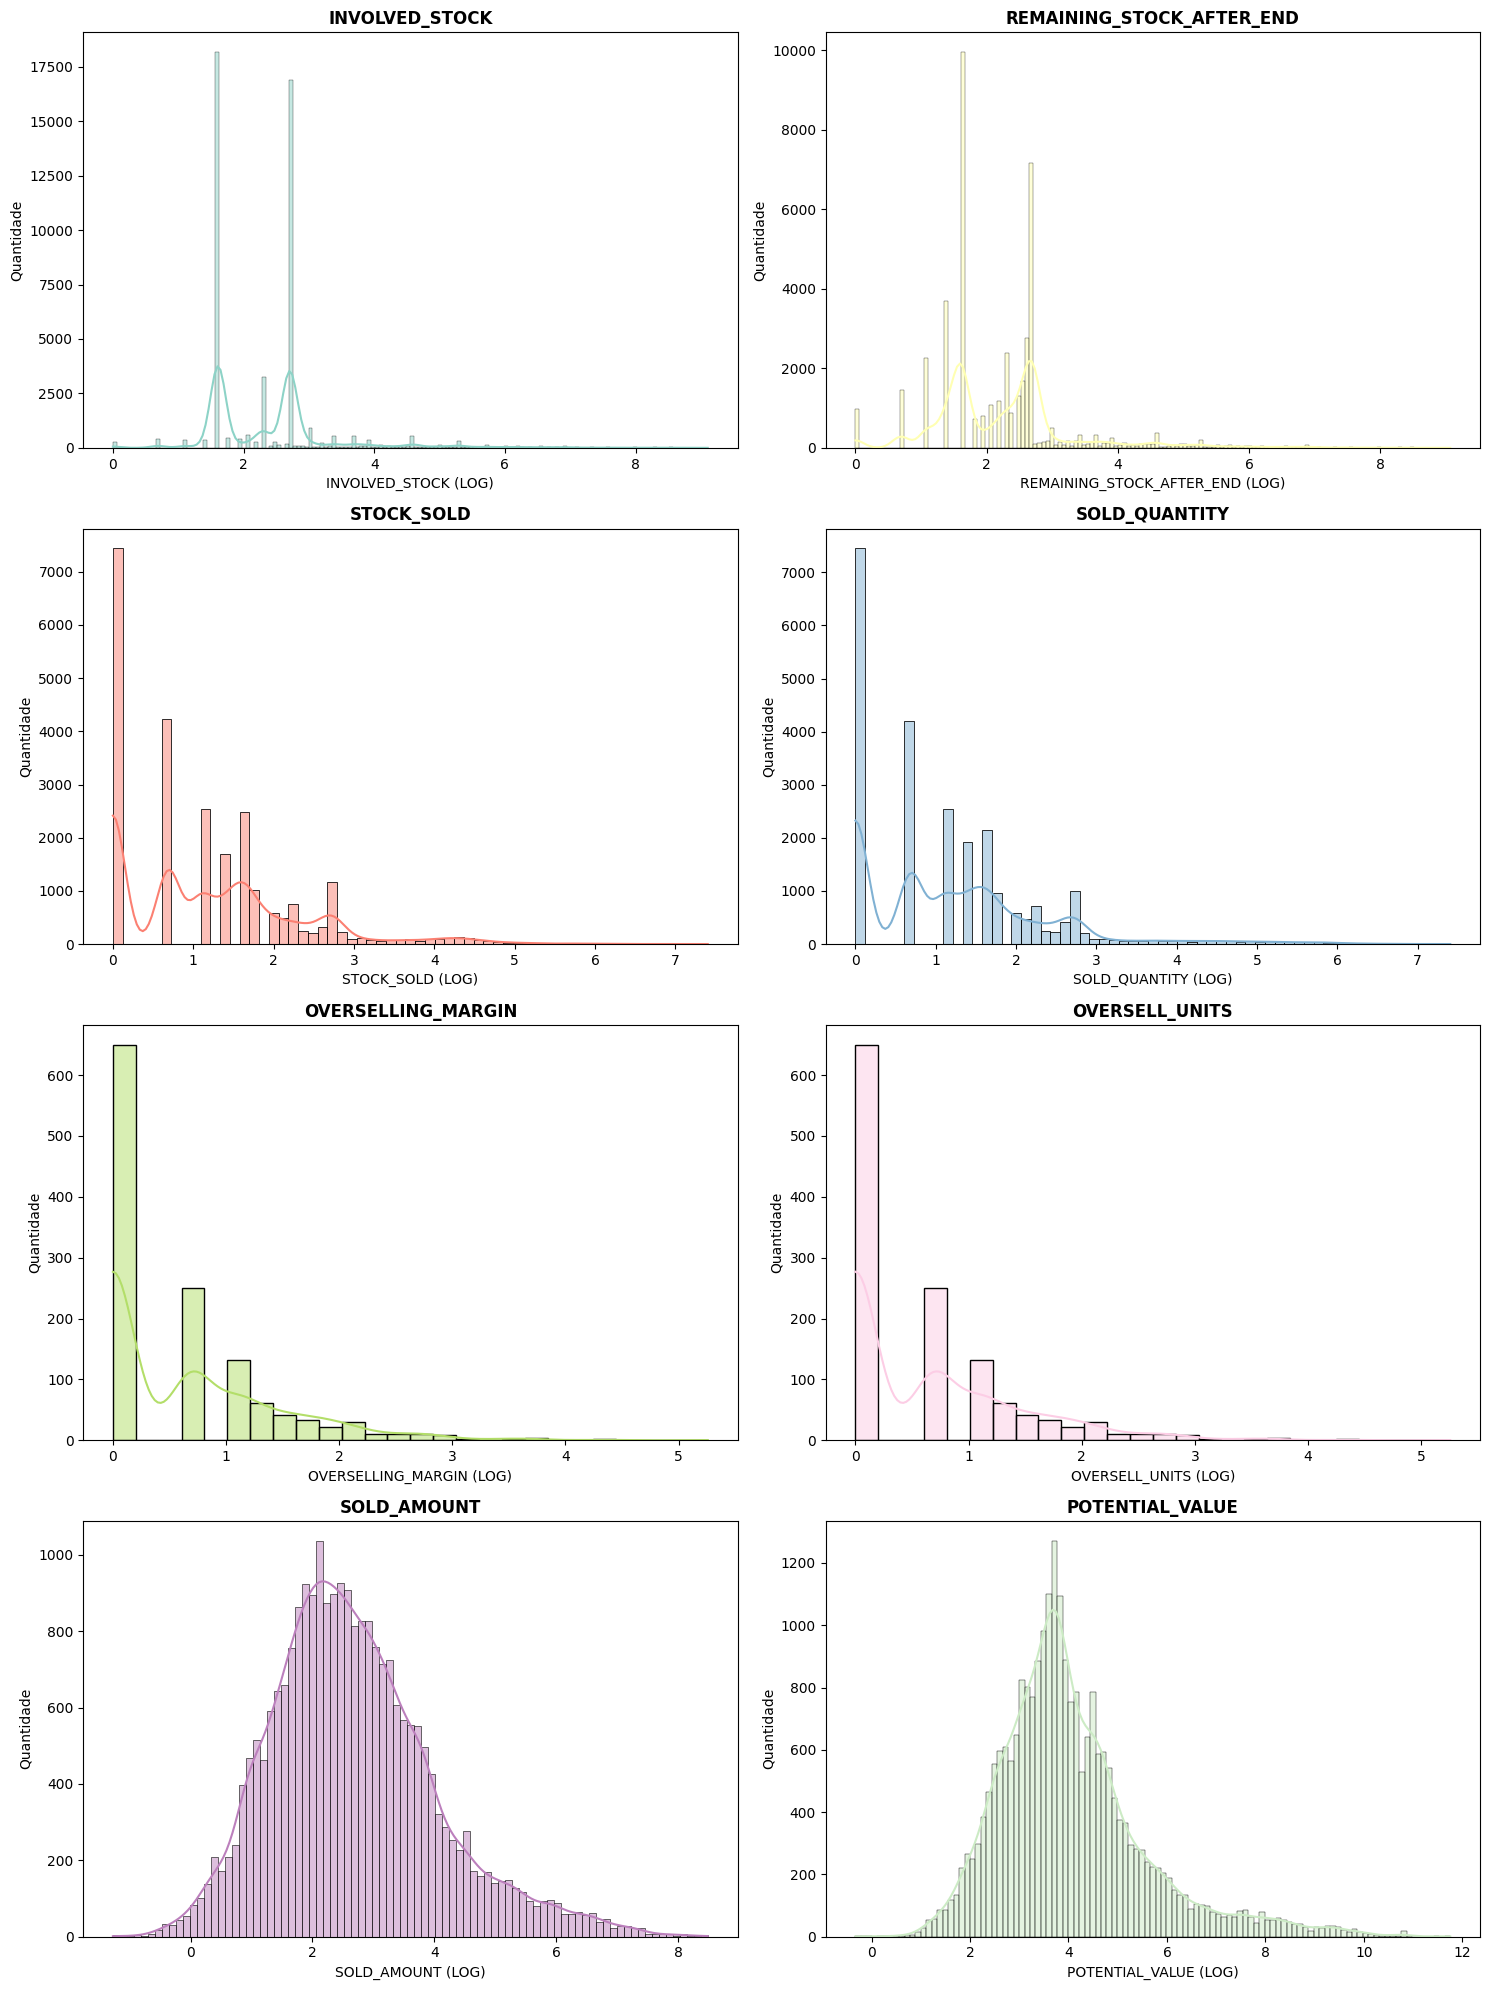

In [14]:
analise_distribuicoes_graficos(df_tratado, colunas['viz_quantidades'], log_scale=True, log_transform="log", plot_type='both')

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS
(Escala Logarítmica - Transformação: LOG1P)



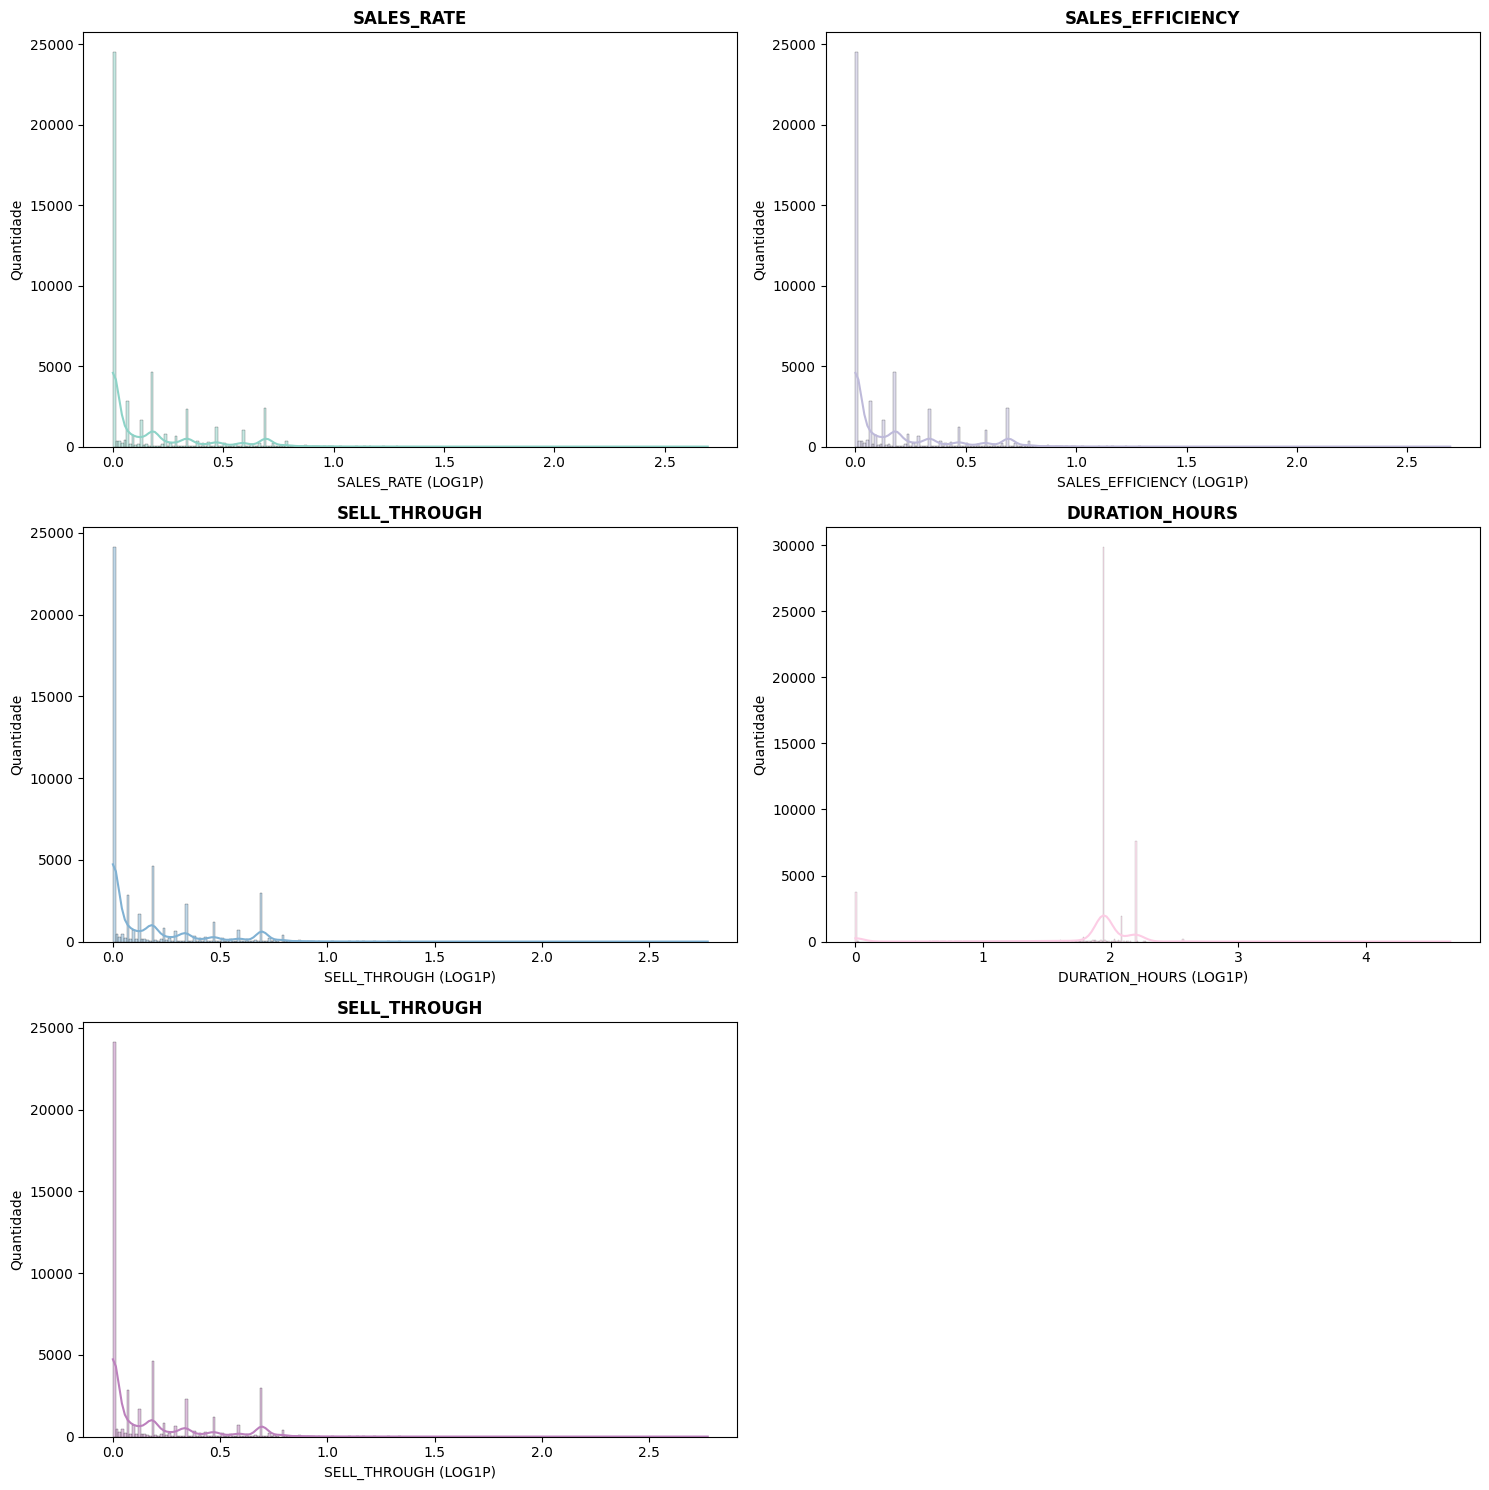

In [15]:
analise_distribuicoes_graficos(df_tratado, colunas['viz_taxas'], log_scale=True, log_transform="log1p", plot_type='both')

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS
(Escala Logarítmica - Transformação: LOG1P)



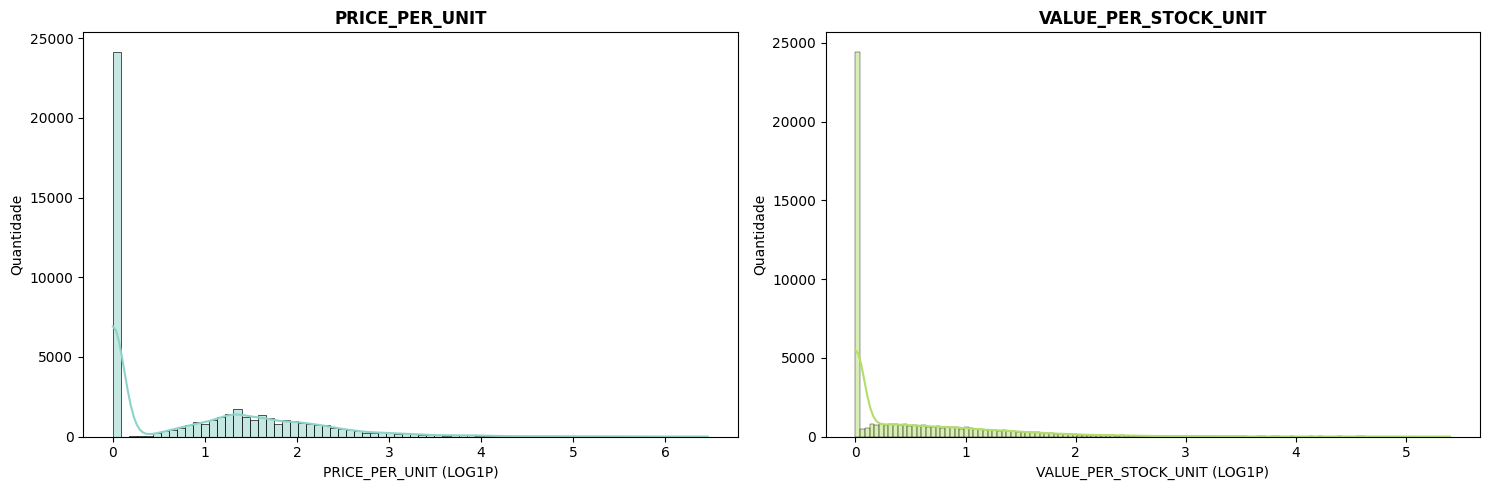

In [16]:
analise_distribuicoes_graficos(df_tratado, colunas['viz_precos'], log_scale=True, log_transform="log1p", plot_type='both')

#### Boxplots

In [39]:
analise_outliers(df_tratado, colunas['todas_numericas'])

=== OUTLIERS ===
+---------------------------+--------------+-------------------+
| Variável                  |   Quantidade |   Porcentagem (%) |
+===========================+==============+===================+
| INVOLVED_STOCK            |         4445 |              9.12 |
+---------------------------+--------------+-------------------+
| REMAINING_STOCK_AFTER_END |         4154 |              8.52 |
+---------------------------+--------------+-------------------+
| SOLD_AMOUNT               |         2953 |              6.06 |
+---------------------------+--------------+-------------------+
| SOLD_QUANTITY             |         2897 |              5.94 |
+---------------------------+--------------+-------------------+
| DURATION_HOURS            |        19547 |             40.10 |
+---------------------------+--------------+-------------------+
| START_HOUR                |            0 |              0.00 |
+---------------------------+--------------+-------------------+
| WEEKDA

GRÁFICOS - BOXPLOT DAS VARIÁVEIS NUMÉRICAS


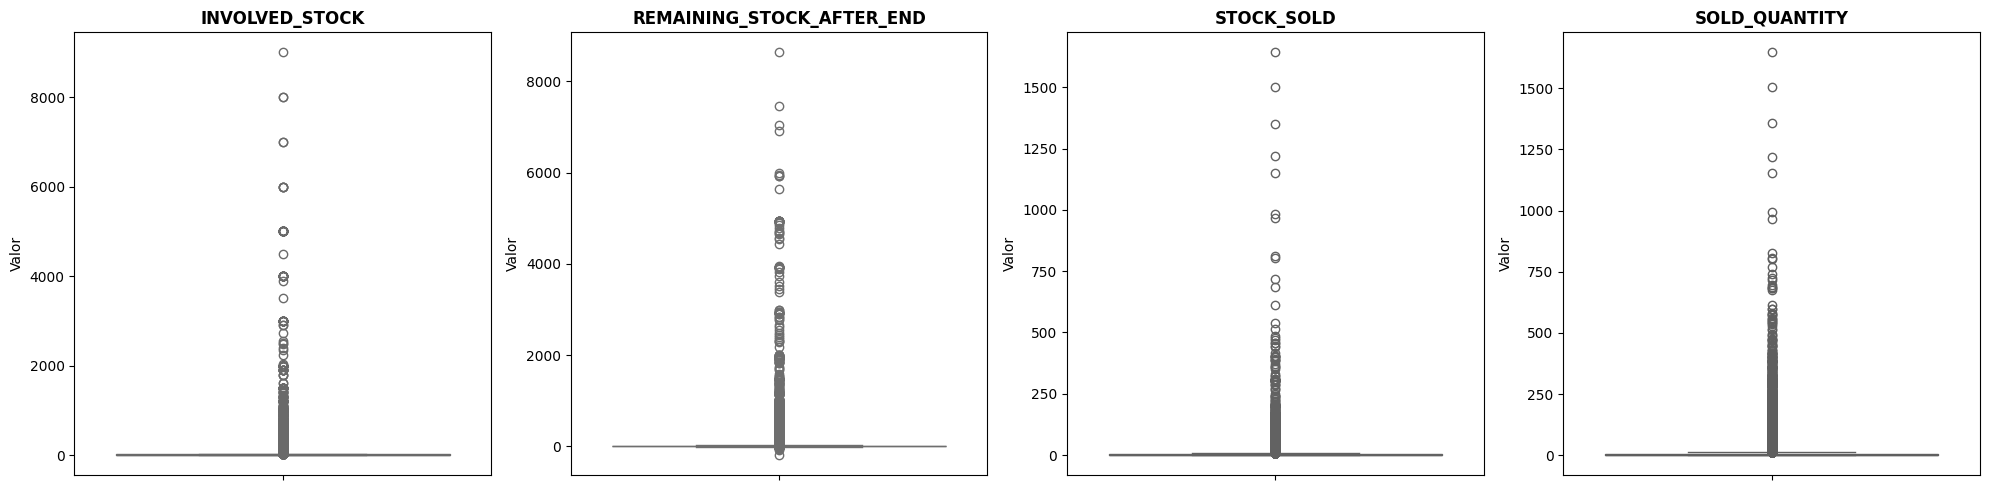

In [17]:
analise_boxplots_graficos(df_tratado, colunas['box_quantidades'])

GRÁFICOS - BOXPLOT DAS VARIÁVEIS NUMÉRICAS


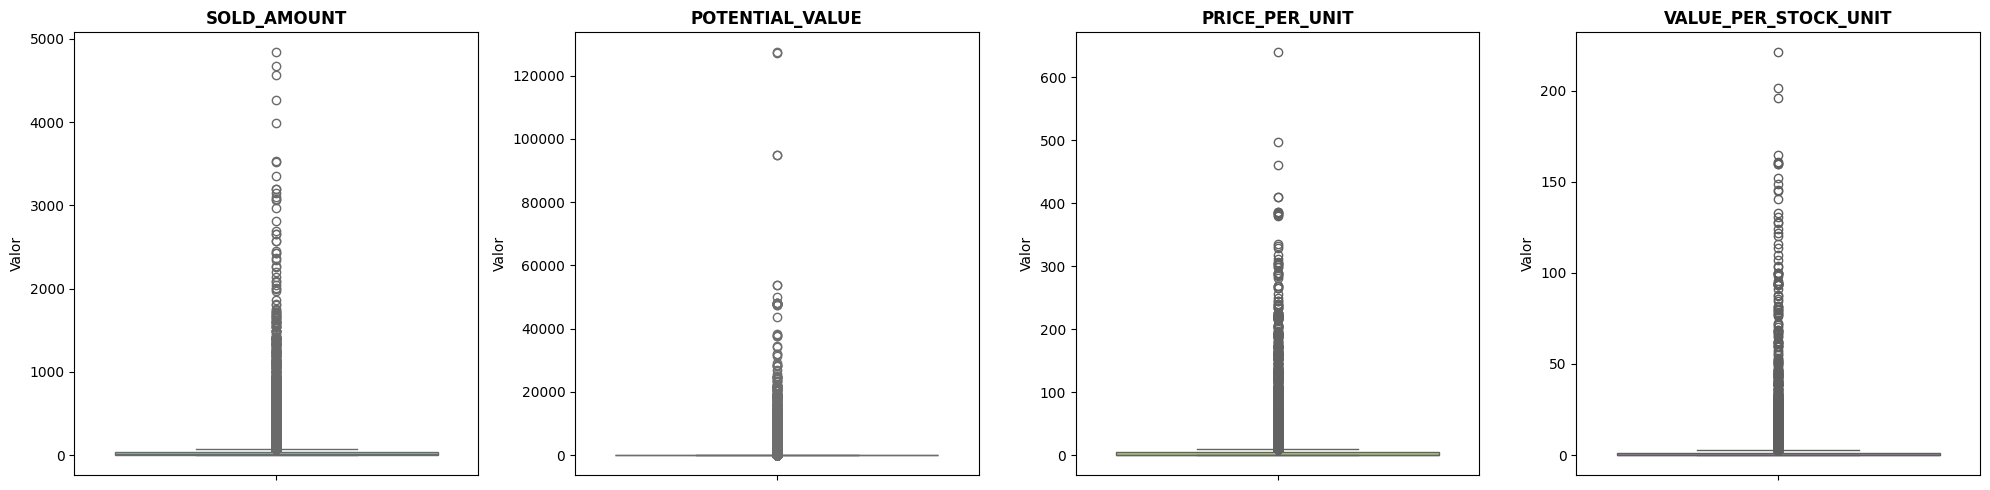

In [18]:
analise_boxplots_graficos(df_tratado, colunas['box_valores'])

GRÁFICOS - BOXPLOT DAS VARIÁVEIS NUMÉRICAS


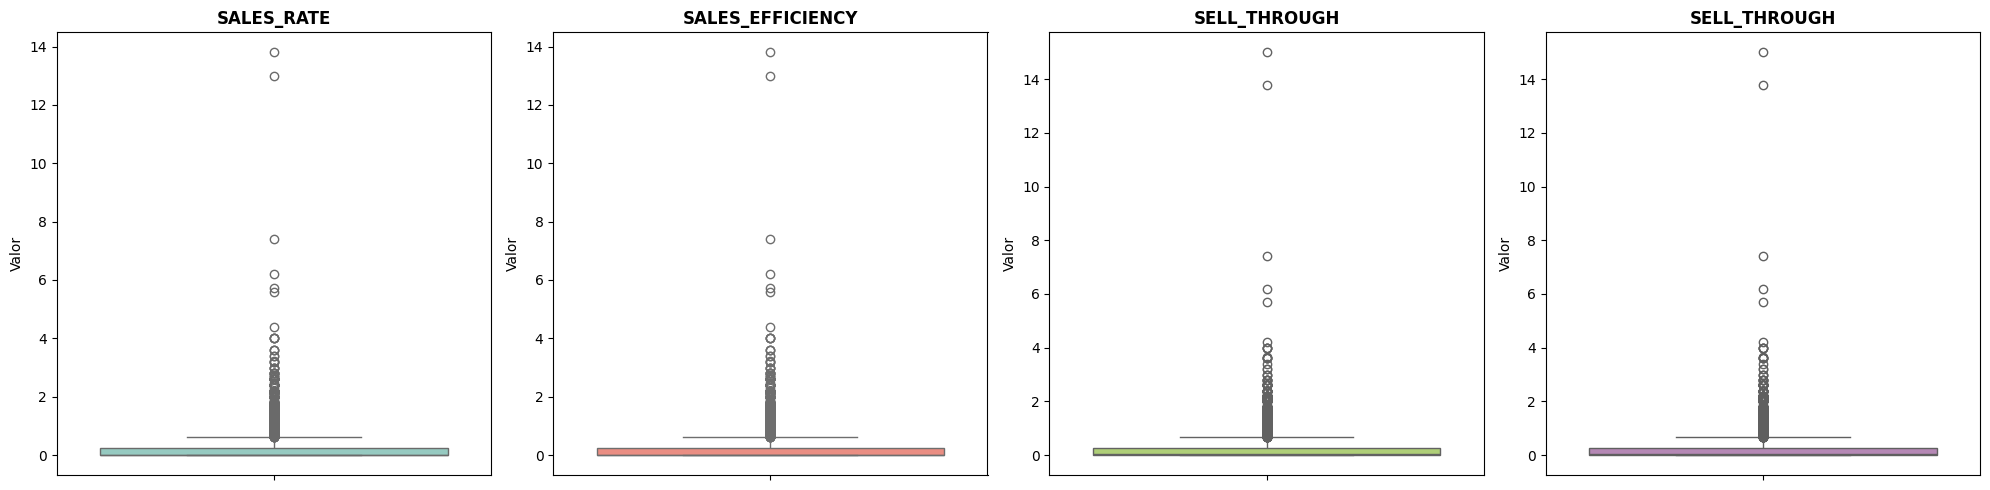

In [19]:
analise_boxplots_graficos(df_tratado, colunas['box_taxas'])

### Correlações Numéricas

GRÁFICO - MATRIX DE CORRELAÇÃO DAS VARIÁVEIS NUMÉRICAS


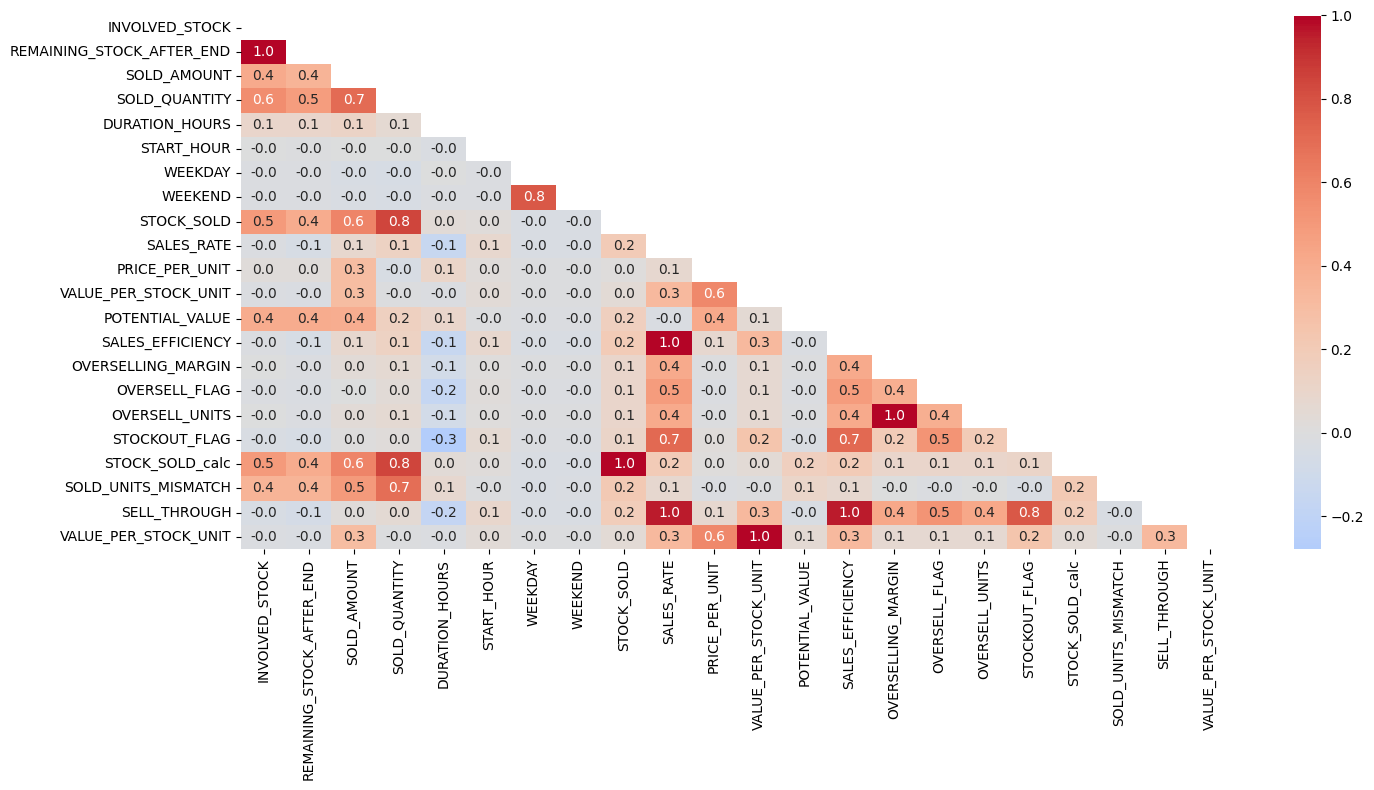

In [20]:
grafico_correlacao_numericas(df_tratado, colunas['todas_numericas'])

In [21]:
_ = exibir_pares_correlacionados(df_tratado, colunas['todas_numericas'], threshold=0.8)


PARES DE VARIÁVEIS ALTAMENTE CORRELACIONADAS (|r| >= 0.8)

Total de pares encontrados: 9

--------------------------------------------------------------------------------
POR TIPO DE RELAÇÃO:
--------------------------------------------------------------------------------
   - Criada × Criada: 6 pares
   - Original × Original: 1 pares
   - Original × Criada: 2 pares

--------------------------------------------------------------------------------
TOP 10 CORRELAÇÕES MAIS FORTES:
--------------------------------------------------------------------------------

5. SALES_RATE x SALES_EFFICIENCY
   Correlação: +1.000
   Vendas (Criada) x Potencial (Criada)

9. OVERSELLING_MARGIN x OVERSELL_UNITS
   Correlação: +1.000
   Overselling (Criada) x Overselling (Criada)

4. STOCK_SOLD x STOCK_SOLD_calc
   Correlação: +1.000
   Vendas (Criada) x Qualidade (Criada)

7. VALUE_PER_STOCK_UNIT x VALUE_PER_STOCK_UNIT
   Correlação: +1.000
   Preço (Criada) x Preço (Criada)

1. INVOLVED_STOCK x REMAINING

### Análise Distribuição Categóricas

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS


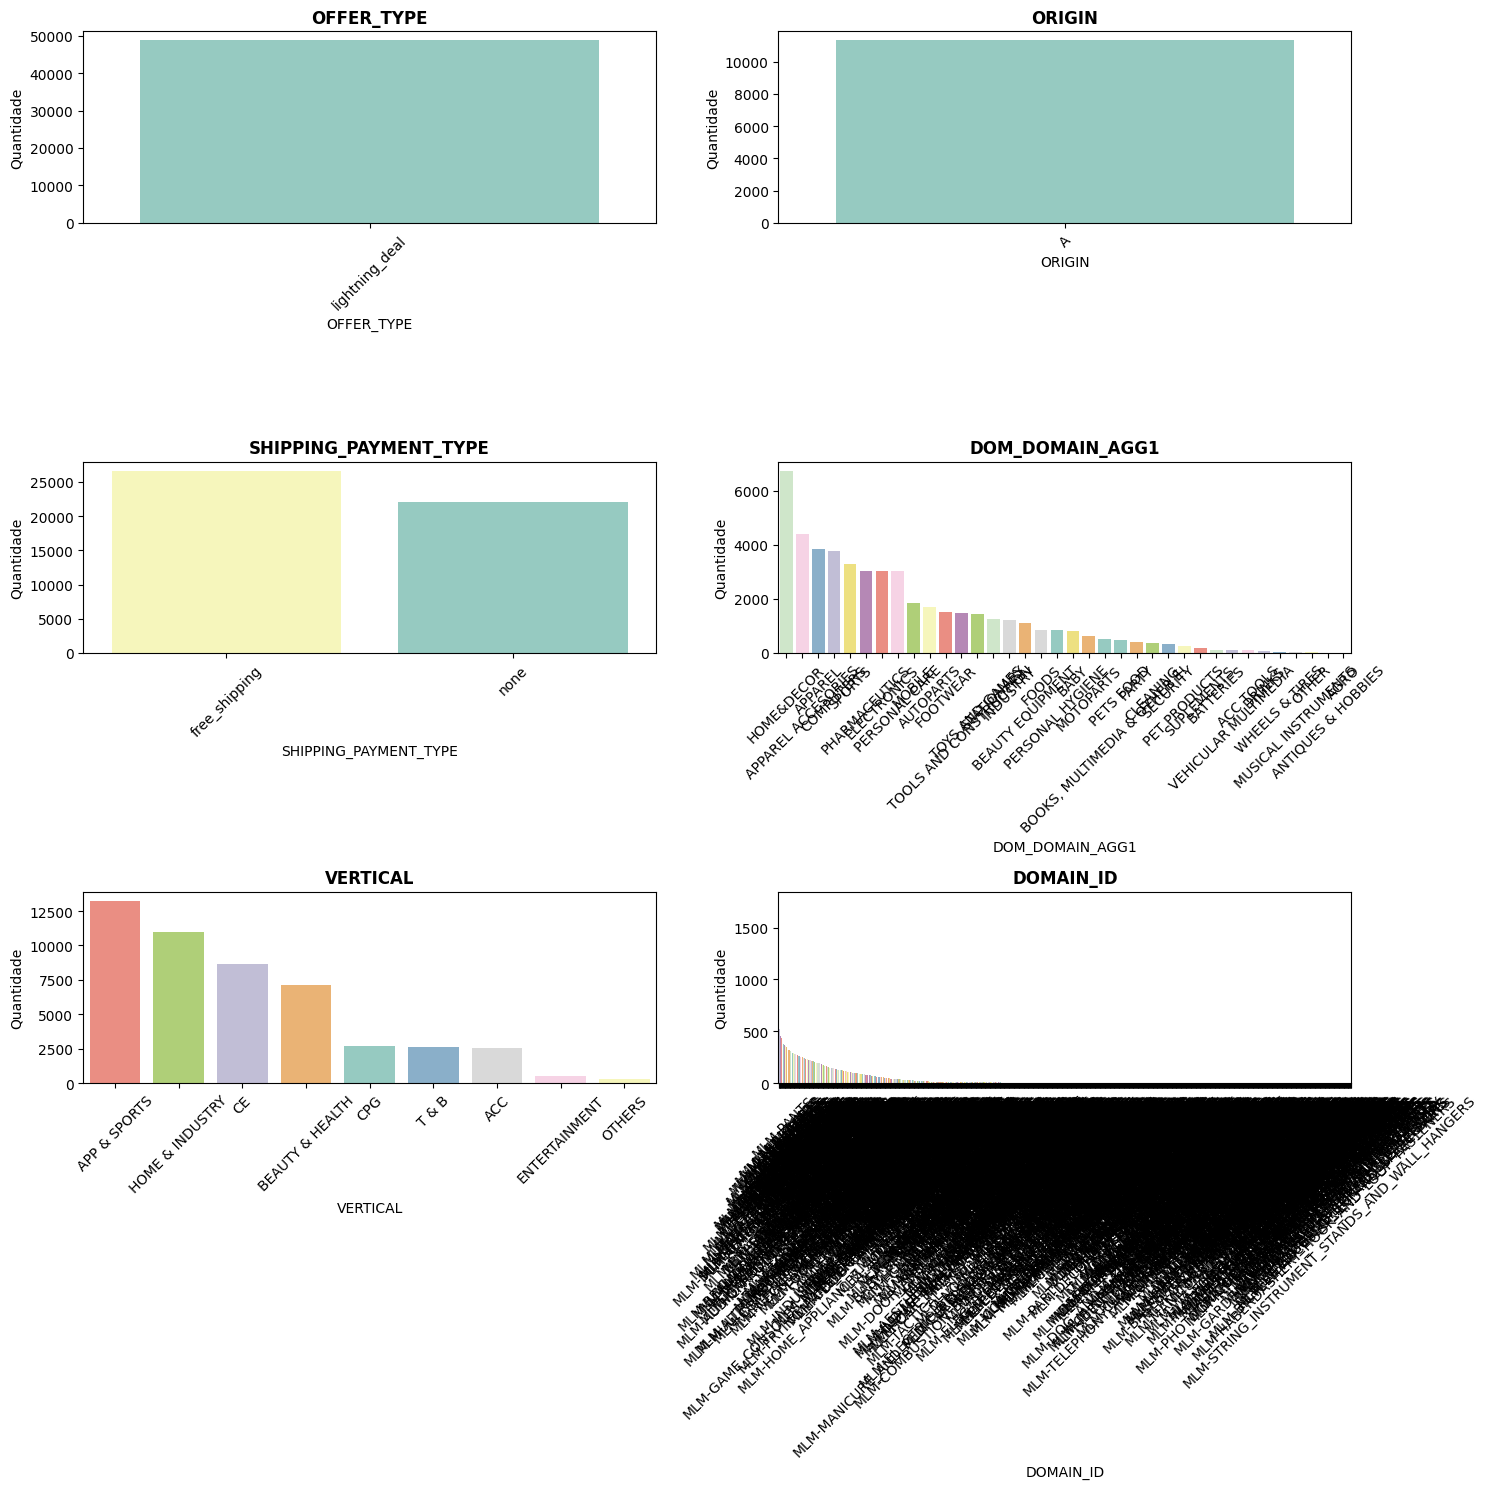

In [22]:
graficos_distribuicao_categoricas(df_tratado, colunas['categoricas'])

Podemos que a Coluna ORIGIN tem poucos dados, além disto Tipo de frete disponível temos boa distribuição entre ambos.

Quando olhamos para domínio agregado, predominância de Home&Decor, APPAREL.

Quando olhamos para Vertical Temos APP & Sports e Home & Industry como os 2 principais. 

# Começar a investigar as ofertas

In [23]:
total_ofertas = len(df_tratado)
print(f"Total de ofertas analisadas: {total_ofertas:,}")

periodo_inicio = df_tratado['OFFER_START_DATE'].min()
periodo_fim = df_tratado['OFFER_START_DATE'].max()
print(f"Período analisado: {periodo_inicio} a {periodo_fim}")

categorias = df_tratado['PERFORMANCE_CATEGORY'].value_counts()
taxa_media = df_tratado['SALES_RATE'].mean()

print(f"Taxa média de venda: {taxa_media:.2%}")
print(f"Ofertas esgotadas: {categorias['Esgotada']:,} ({categorias['Esgotada']/total_ofertas*100:.1f}%)")
print(f"Ofertas não esgotadas: {categorias['Venda_Parcial']:,} ({categorias['Venda_Parcial']/total_ofertas*100:.1f}%)")
print(f"Ofertas não vendidas: {categorias['Não_Vendida']:,} ({categorias['Não_Vendida']/total_ofertas*100:.1f}%)")

Total de ofertas analisadas: 48,746
Período analisado: 2021-06-01 00:00:00 a 2021-07-31 00:00:00
Taxa média de venda: 20.67%
Ofertas esgotadas: 3,651 (7.5%)
Ofertas não esgotadas: 20,928 (42.9%)
Ofertas não vendidas: 24,167 (49.6%)


## Ofertas que não venderam

ANÁLISE DE OFERTAS: NÃO_VENDIDA
Total de ofertas não_vendida: 24,167
Percentual do total: 49.6%
Todas as ofertas têm SALES_RATE = 0

Top 10 ofertas não_vendida:
       VERTICAL DOM_DOMAIN_AGG1  INVOLVED_STOCK  STOCK_SOLD  SALES_RATE  SOLD_AMOUNT
         OTHERS    PET PRODUCTS               5           0         0.0          NaN
             CE       COMPUTERS              23           0         0.0          NaN
             CE       COMPUTERS              10           0         0.0          NaN
             CE       COMPUTERS              10          11         0.0          NaN
             CE     ELECTRONICS              15           0         0.0          NaN
            CPG       PETS FOOD               6           0         0.0          NaN
   APP & SPORTS         APPAREL               5           0         0.0          NaN
          T & B           PARTY              10           0         0.0          NaN
BEAUTY & HEALTH   PERSONAL CARE              30           0         0.0   

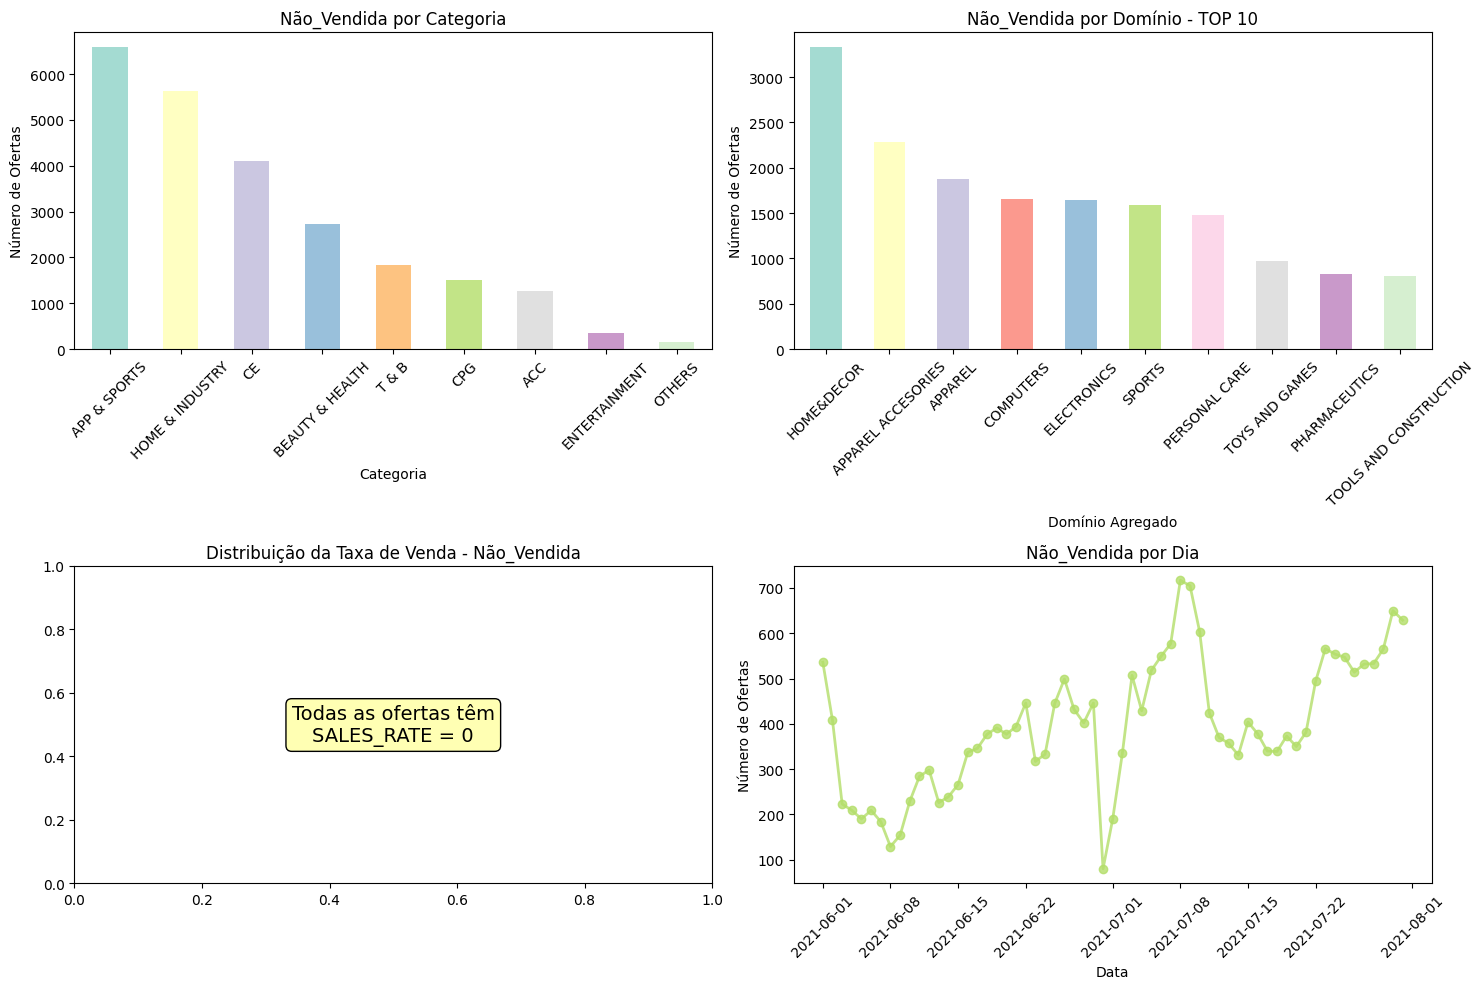


Resumo por Vertical:
                 Quantidade  Taxa_Media  Receita_Total
VERTICAL                                              
APP & SPORTS           6592         0.0            0.0
HOME & INDUSTRY        5632         0.0            0.0
CE                     4100         0.0            0.0
BEAUTY & HEALTH        2722         0.0            0.0
T & B                  1843         0.0            0.0
CPG                    1507         0.0            0.0
ACC                    1264         0.0            0.0
ENTERTAINMENT           347         0.0            0.0
OTHERS                  160         0.0            0.0


In [24]:
_ = analisar_categoria_performance(df_tratado, 'Não_Vendida')

## Ofertas que venderam até o fim do estoque

ANÁLISE DE OFERTAS: VENDA_PARCIAL
Total de ofertas venda_parcial: 20,928
Percentual do total: 42.9%
Taxa média de venda: 28.47%

Top 10 ofertas venda_parcial:
       VERTICAL  DOM_DOMAIN_AGG1  INVOLVED_STOCK  STOCK_SOLD  SALES_RATE  SOLD_AMOUNT
BEAUTY & HEALTH    PHARMACEUTICS             810         811    0.997531      2255.46
HOME & INDUSTRY         INDUSTRY             250         250    0.996000       788.24
BEAUTY & HEALTH    PHARMACEUTICS             400         404    0.995000       671.36
BEAUTY & HEALTH    PHARMACEUTICS             240         240    0.991667       887.73
             CE      ELECTRONICS             100          97    0.990000      2202.59
BEAUTY & HEALTH BEAUTY EQUIPMENT             100         103    0.990000       428.16
BEAUTY & HEALTH    PHARMACEUTICS              42          42    0.976190       732.39
   APP & SPORTS           SPORTS              40          41    0.975000        49.81
HOME & INDUSTRY       HOME&DECOR              40          40    0.9

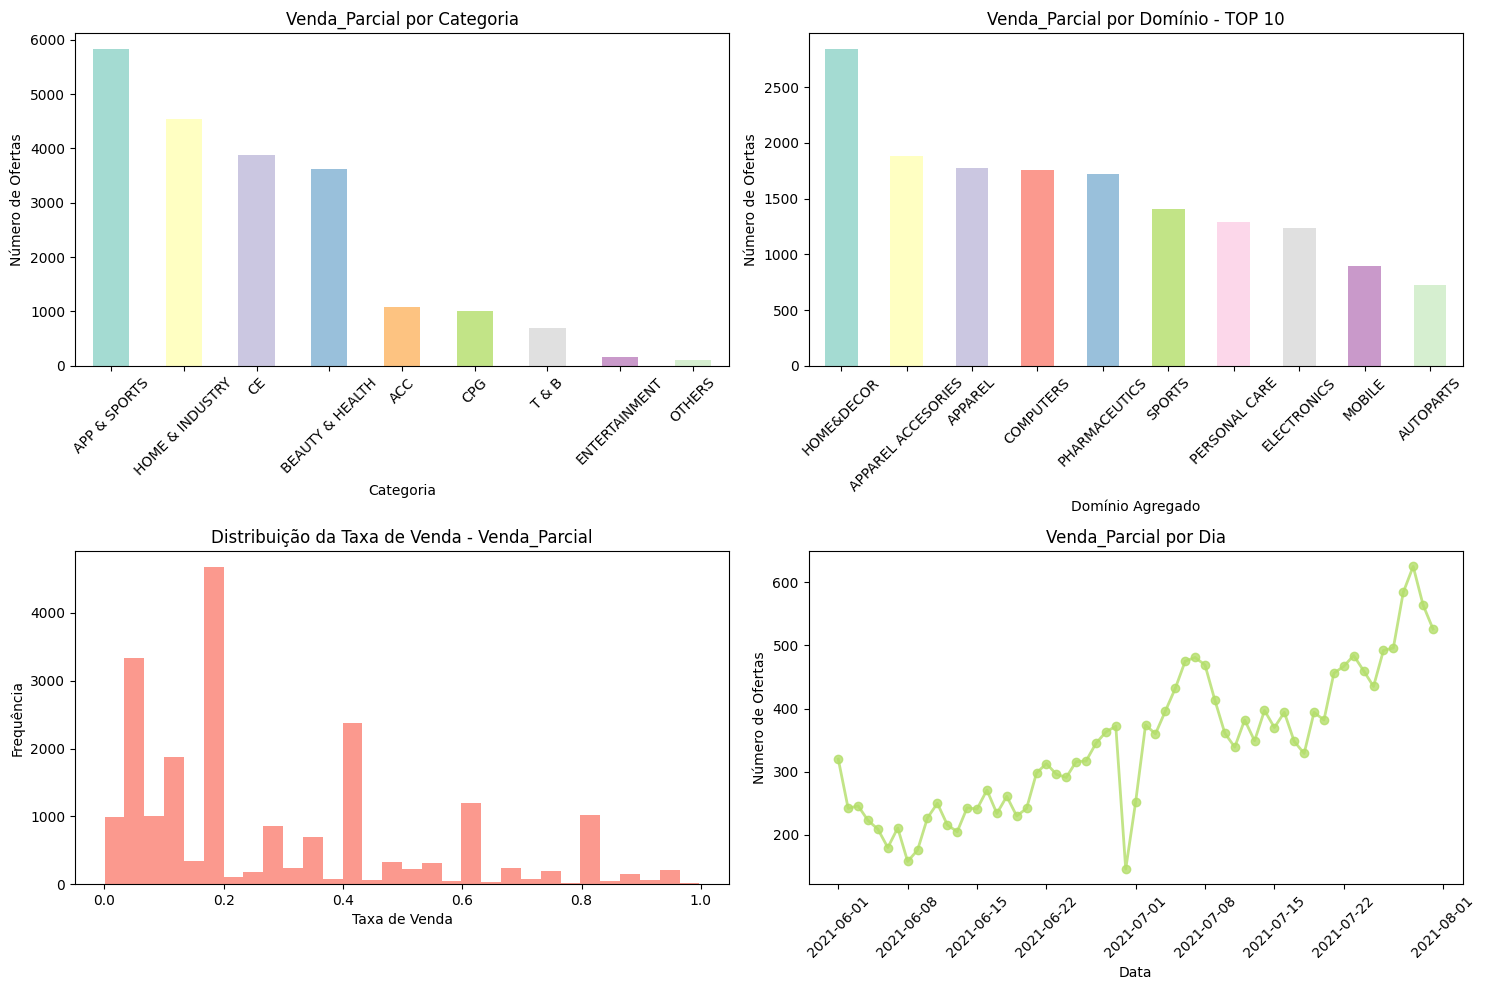


Resumo por Vertical:
                 Quantidade  Taxa_Media  Receita_Total
VERTICAL                                              
APP & SPORTS           5838        0.28      107775.07
HOME & INDUSTRY        4545        0.28      115704.99
CE                     3885        0.27      312117.02
BEAUTY & HEALTH        3616        0.30      418961.18
ACC                    1076        0.32       18889.27
CPG                     999        0.29       12404.04
T & B                   698        0.24       12394.52
ENTERTAINMENT           161        0.29        1571.22
OTHERS                  110        0.29        1668.76


In [25]:
_ = analisar_categoria_performance(df_tratado, 'Venda_Parcial')

## Ofertas que Venderam acima do Estoque

ANÁLISE DE OFERTAS: ESGOTADA
Total de ofertas esgotada: 3,651
Percentual do total: 7.5%
Taxa média de venda: 112.82%
Ofertas com overselling: 1,239 (33.9%)

Top 10 ofertas esgotada:
       VERTICAL    DOM_DOMAIN_AGG1  INVOLVED_STOCK  STOCK_SOLD  SALES_RATE  SOLD_AMOUNT
             CE          COMPUTERS              15         207   13.800000       893.26
          T & B     TOYS AND GAMES               5          75   13.000000        60.86
   APP & SPORTS             SPORTS               5          37    7.400000       127.61
   APP & SPORTS             SPORTS               5          31    6.200000        99.12
            CPG          PETS FOOD               7          40    5.714286        19.36
   APP & SPORTS            APPAREL               5          18    5.600000        62.78
   APP & SPORTS APPAREL ACCESORIES               5           2    4.400000        13.66
HOME & INDUSTRY         HOME&DECOR               5          20    4.000000        84.52
   APP & SPORTS           

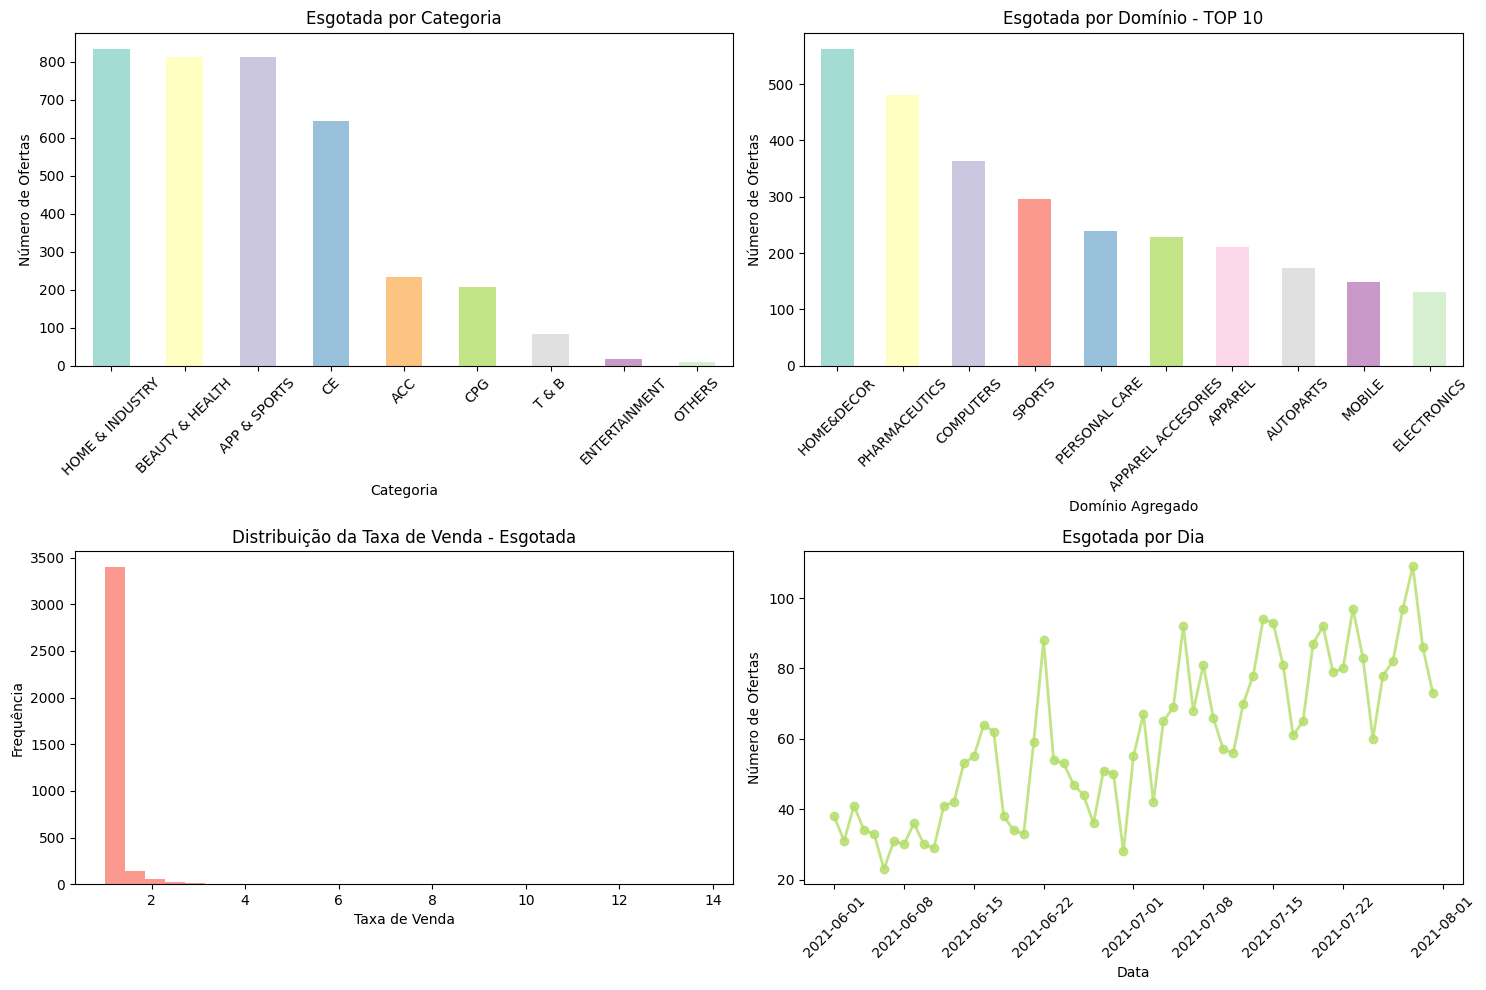


Resumo por Vertical:
                 Quantidade  Taxa_Media  Receita_Total
VERTICAL                                              
HOME & INDUSTRY         834        1.13       39813.69
BEAUTY & HEALTH         812        1.14      128466.09
APP & SPORTS            811        1.11       23326.29
CE                      644        1.10       50670.92
ACC                     233        1.13        7930.71
CPG                     208        1.17        4383.64
T & B                    83        1.40        1908.26
ENTERTAINMENT            17        1.00         417.35
OTHERS                    9        1.10         260.48


In [26]:
_ = analisar_categoria_performance(df_tratado, 'Esgotada')

O que podemos ver que vendas que foram acima do estoque a com maior quantidade de ofertas foi a de Home & Industry, diferente da APP & Sports que predomina como na quantidade total, na que não vendeu e que vendeu até o fim do estoque.


Também tivemos mudanças de posição quando olhamos para Domínio agregado, o que pode nos ajudar tanto a gerenciar ofertas pensadas em Verticais e Domínios separados.


Quando olhamos abaixo, temos uma visão melhor da distribuição das verticais e podemos ver que:
- Beauty & Health foi a vertical que teve menos ofertas que não venderam, além de 11% das ofertas terem estourado o estoque envolvido.
- Home & Industry apesar de ser a nossa Vertical com mais ofertas que venderam acima do estoque, ainda sim possui metade das ofertas que não venderam nenhum item.
- APP & Sports ela é a vertical com maior quantidade de ofertas, mas foi a 3ª que tiveram ofertas que venderam acima do estoque e metade da quantidade de ofertas que não venderam nenhum item.

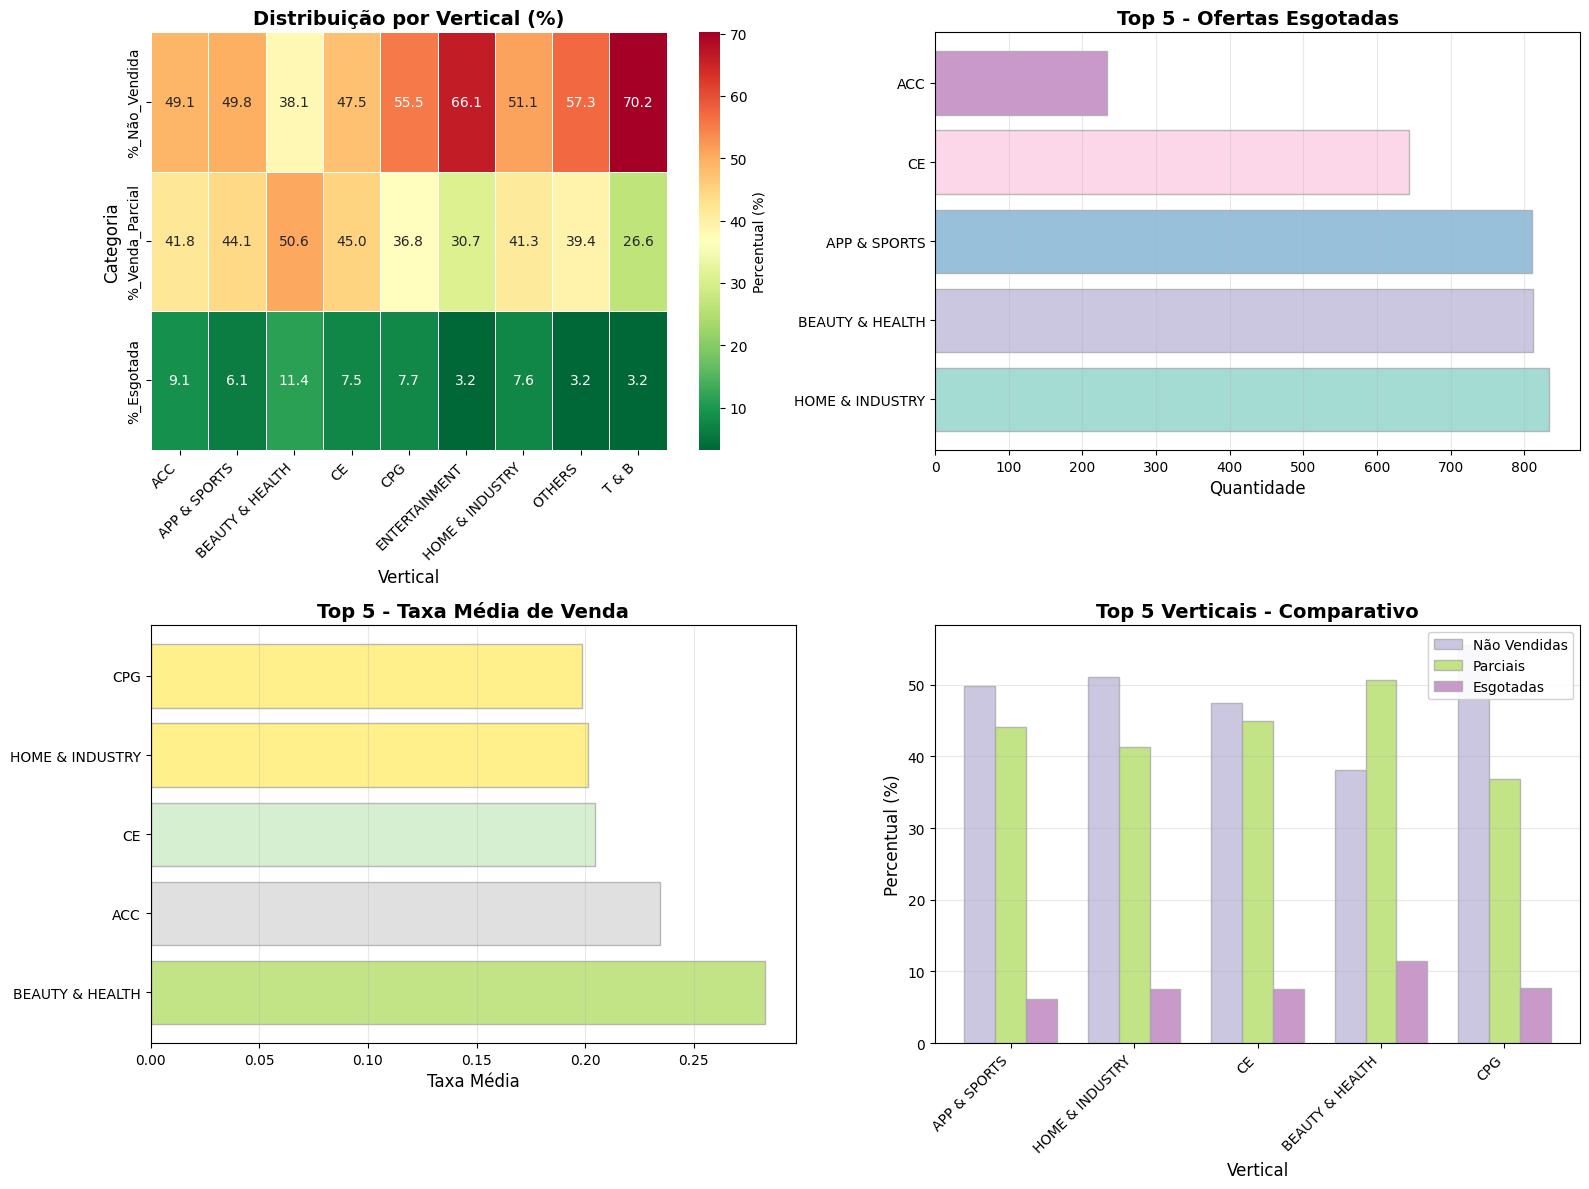


RESUMO ESTATÍSTICO POR VERTICAL

MELHOR PERFORMANCE:
   BEAUTY & HEALTH
   Taxa média: 28.3%
   Esgotadas: 812.0 (11.4%)

PIOR PERFORMANCE:
   T & B
   Taxa média: 10.8%
   Não vendidas: 1,843.0 (70.2%)


In [27]:
_ = analise_completa_por_vertical(df_tratado)

## Quando olhamos nossas ofertas no tempo

ANÁLISE TEMPORAL POR VERTICAL E CATEGORIA

 ESTATÍSTICAS TEMPORAIS:
Período analisado: 2021-06-01 00:00:00 a 2021-07-31 00:00:00
Total de dias: 61
Dias da semana: {'Friday': 7773, 'Saturday': 7506, 'Tuesday': 7322, 'Thursday': 7286, 'Wednesday': 6718, 'Monday': 6307, 'Sunday': 5834}

 PERFORMANCE POR DIA DA SEMANA:
PERFORMANCE_CATEGORY  Esgotada  Não_Vendida  Venda_Parcial  Total  %_Esgotada  \
DIA_SEMANA                                                                      
Friday                     545         3949           3279   7773         7.0   
Monday                     498         2994           2815   6307         7.9   
Saturday                   468         4011           3027   7506         6.2   
Sunday                     380         2983           2471   5834         6.5   
Thursday                   604         3501           3181   7286         8.3   
Tuesday                    605         3611           3106   7322         8.3   
Wednesday                  551     

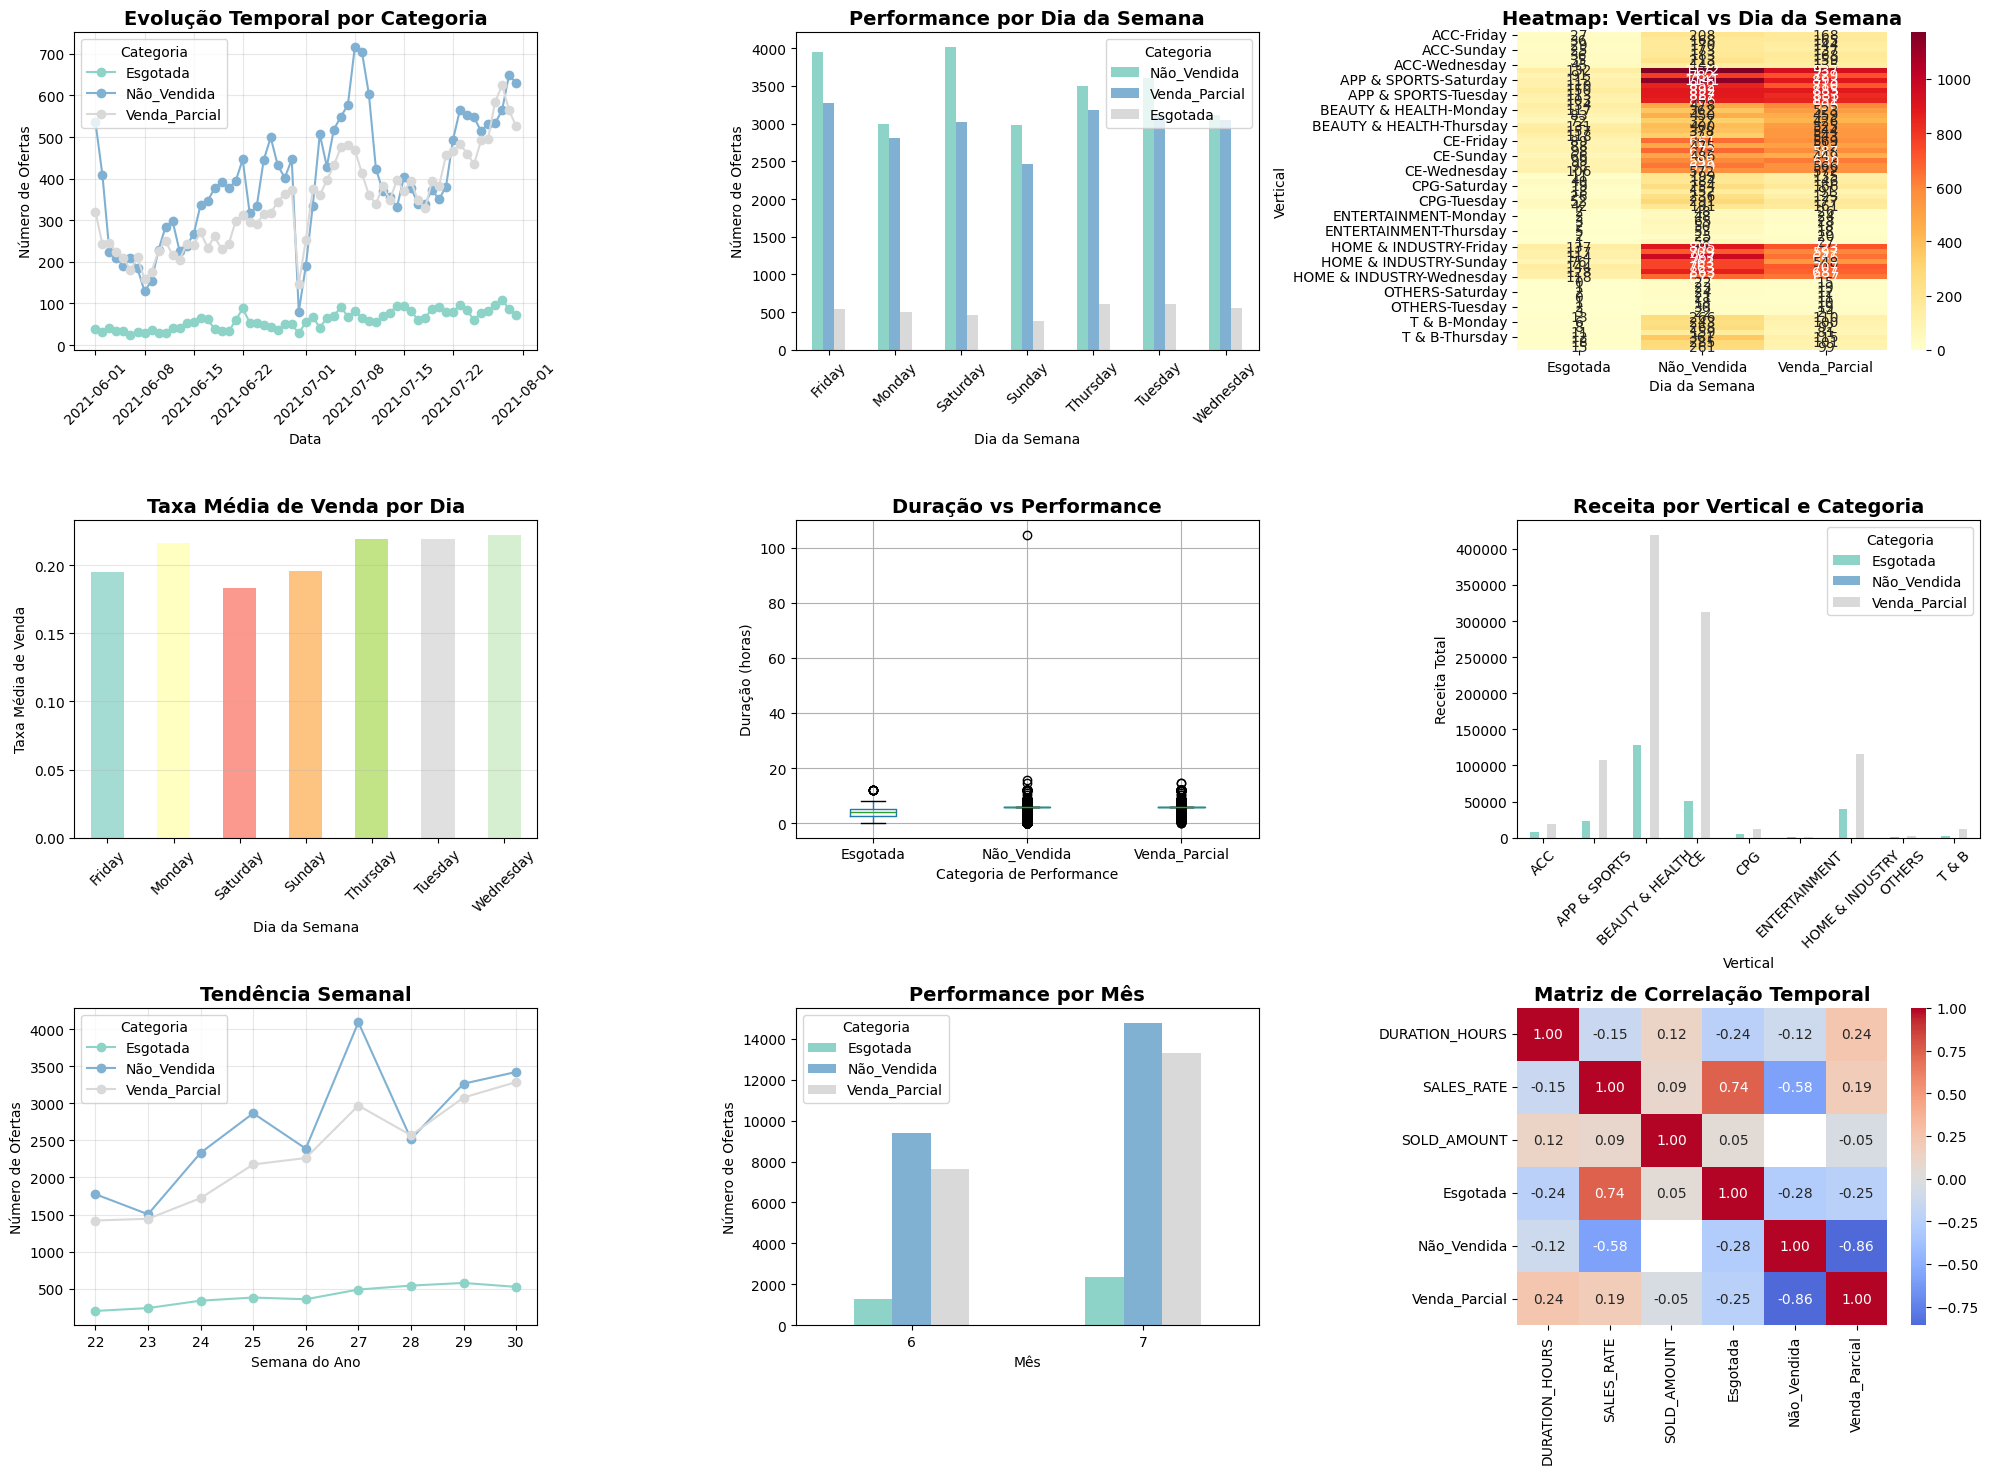


INSIGHTS TEMPORAIS

 MELHOR DIA DA SEMANA (mais esgotadas):
   Thursday: 8.3% esgotadas

 PIOR DIA DA SEMANA (mais não vendidas):
   Saturday: 53.4% não vendidas

 MELHOR VERTICAL TEMPORAL:
   BEAUTY & HEALTH: 28.3% taxa média

 ANÁLISE DE SAZONALIDADE:
   Mês 6: 19.8% taxa média, 1,288 esgotadas
   Mês 7: 21.2% taxa média, 2,363 esgotadas


In [28]:
_ = analise_temporal_por_vertical(df_tratado)

Pensando nos dias da semana, temos o dia com maior quantidade de ofertas foi Sexta-Feira. De terça a quinta tivemos uma taxa muito boa de vendas.

Tivemos um crescimento nas ofertas de vendas, sendo que a tendência se mateve bem distribuída entre as 3 categorias que criamos para avaliar se elas venderam ou não. Temos um gap ali de vendas, que a quantidade de ofertas não vendidas sobe na semana 27.

### Analisando por vertical

ANÁLISE EVOLUTIVA TEMPORAL
Período analisado: 2021-06-01 a 2021-07-31
Total de dias: 61
Total de semanas: 9


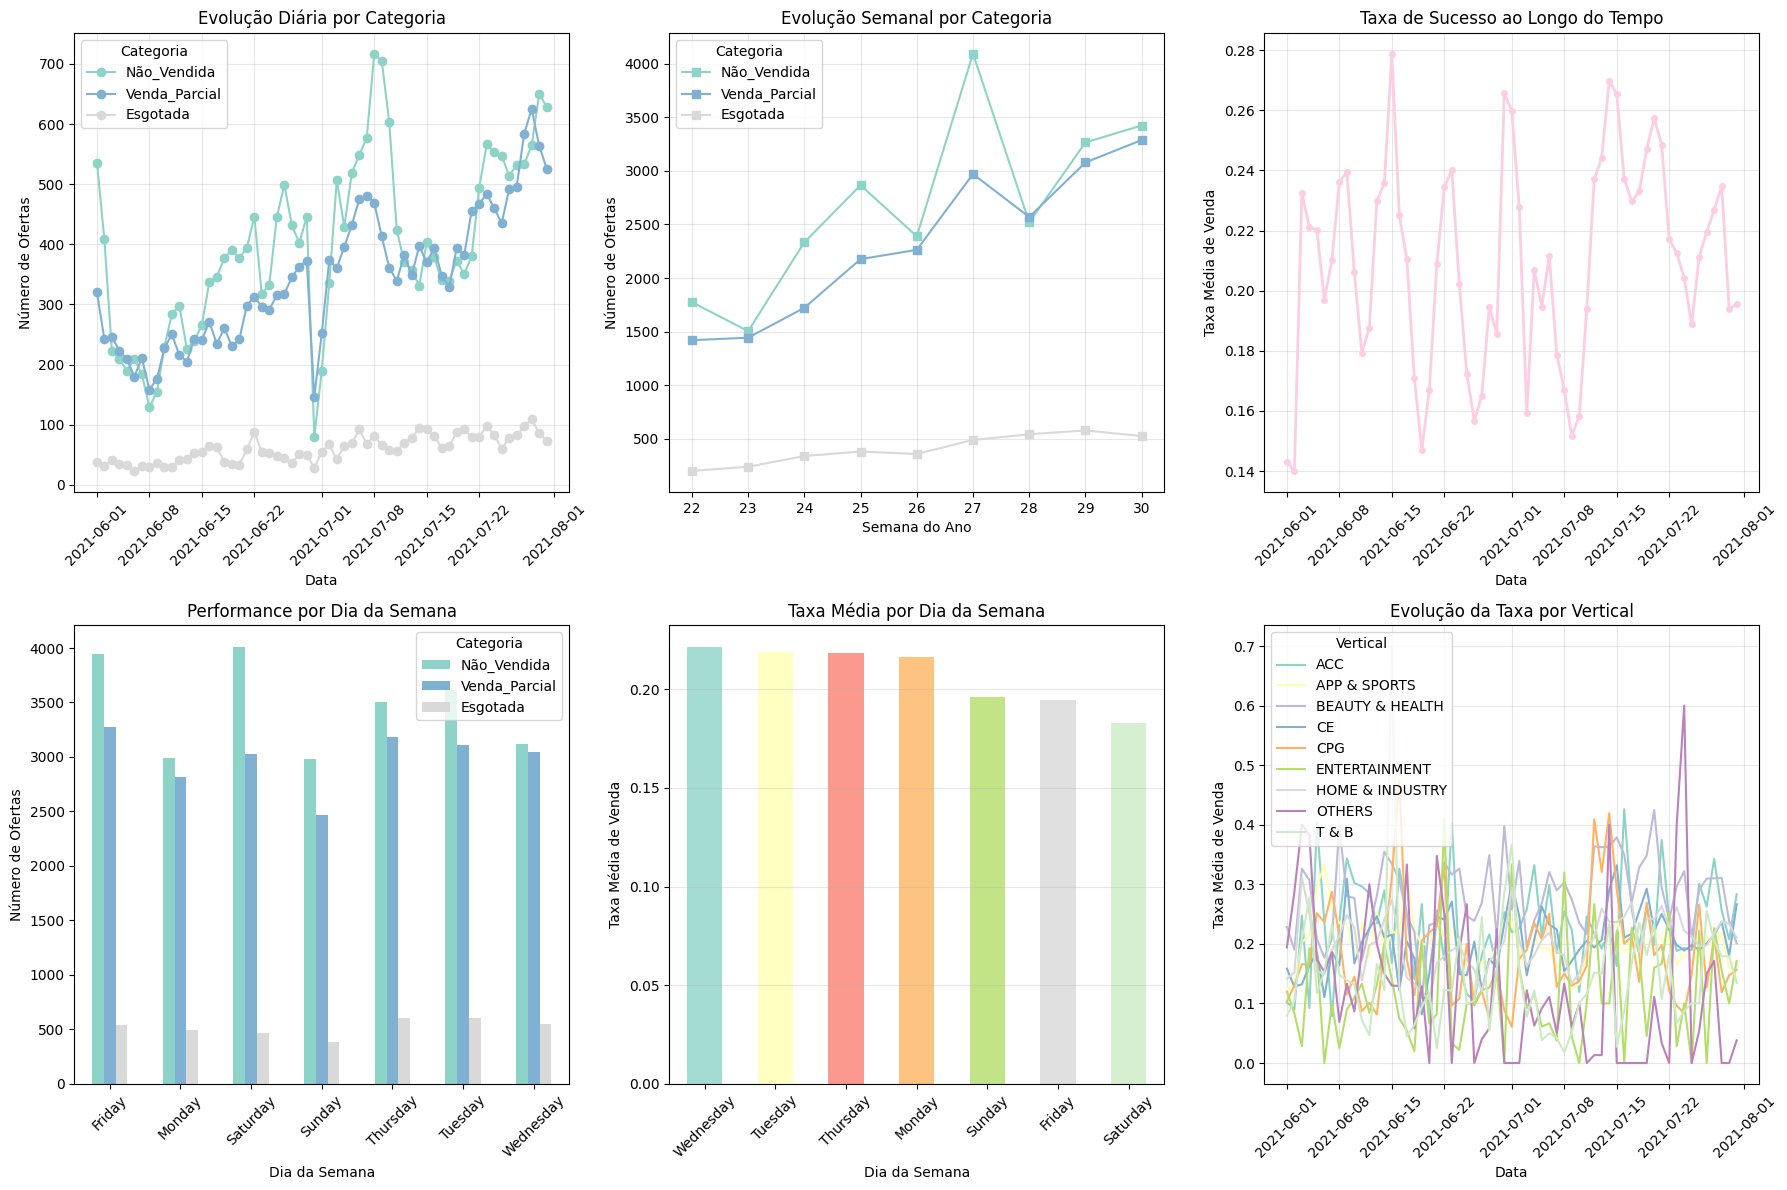


INSIGHTS EVOLUTIVOS

Melhor dia da semana (mais esgotadas):
   Tuesday: 605 esgotadas

Pior dia da semana (mais não vendidas):
   Saturday: 4,011 não vendidas

Tendencia temporal:
   Início do período: 14.3%
   Fim do período: 19.5%
   Performance melhorou ao longo do tempo


In [29]:
_ = analise_evolutiva_temporal(df_tratado)

### Análise de correlações

ANÁLISE DE CORRELACOES E HEATMAPS


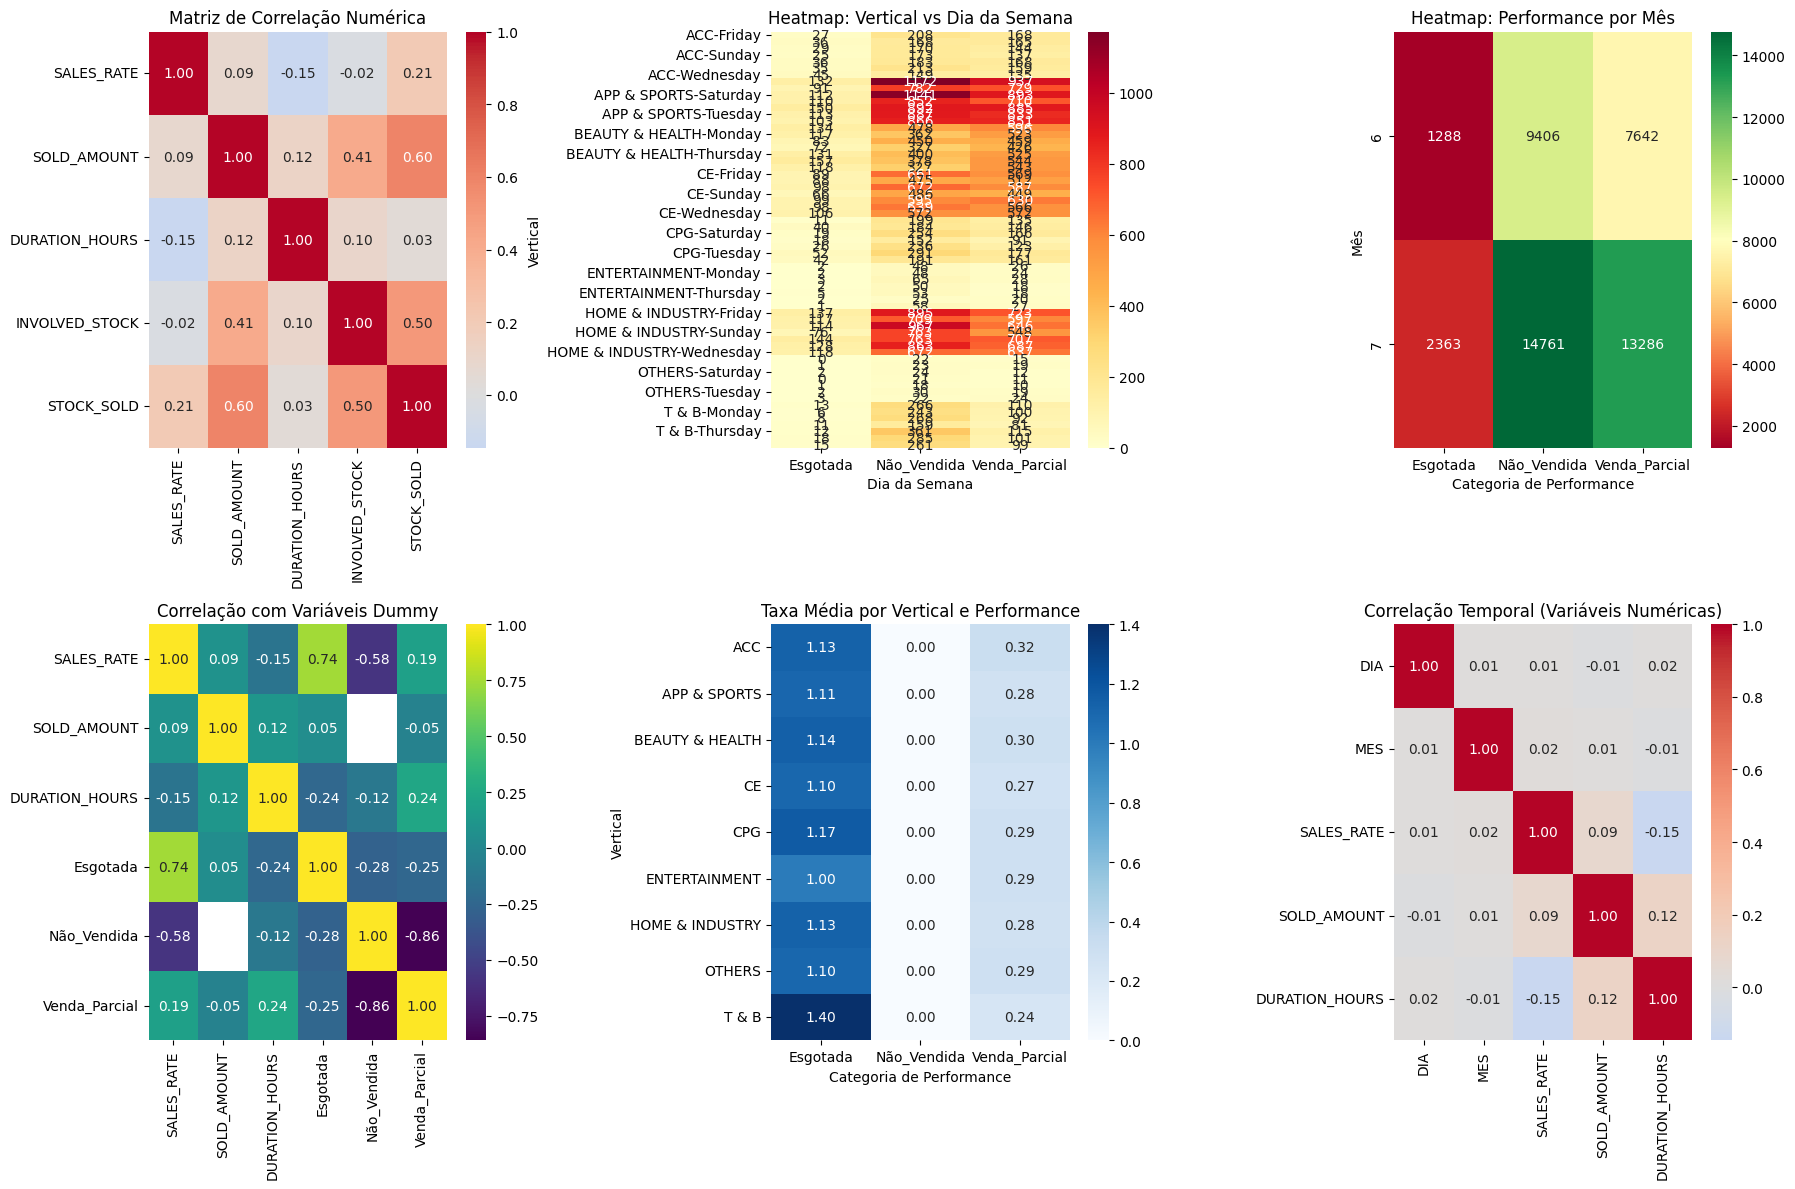


INSIGHTS DE CORRELAÇÃO

Correlacoes mais fortes (|r| > 0.5):
   SOLD_AMOUNT vs STOCK_SOLD: 0.600

Melhor combinação Vertical + Dia:
   APP & SPORTS + Friday: 2241 ofertas

Top 3 combinações Vertical + Dia:
   1. APP & SPORTS + Friday: 2241 ofertas
   2. APP & SPORTS + Saturday: 2146 ofertas
   3. APP & SPORTS + Thursday: 1927 ofertas


In [30]:
_ = analise_correlacoes_heatmaps(df_tratado)

## Análise de duração e receita

ANÁLISE DE DURAÇÃO E RECEITA
Duração média das ofertas: 5.7 horas
Duração mediana das ofertas: 6.0 horas
Receita total: R$ 1,258,663.50
Receita média por oferta: R$ 51.21


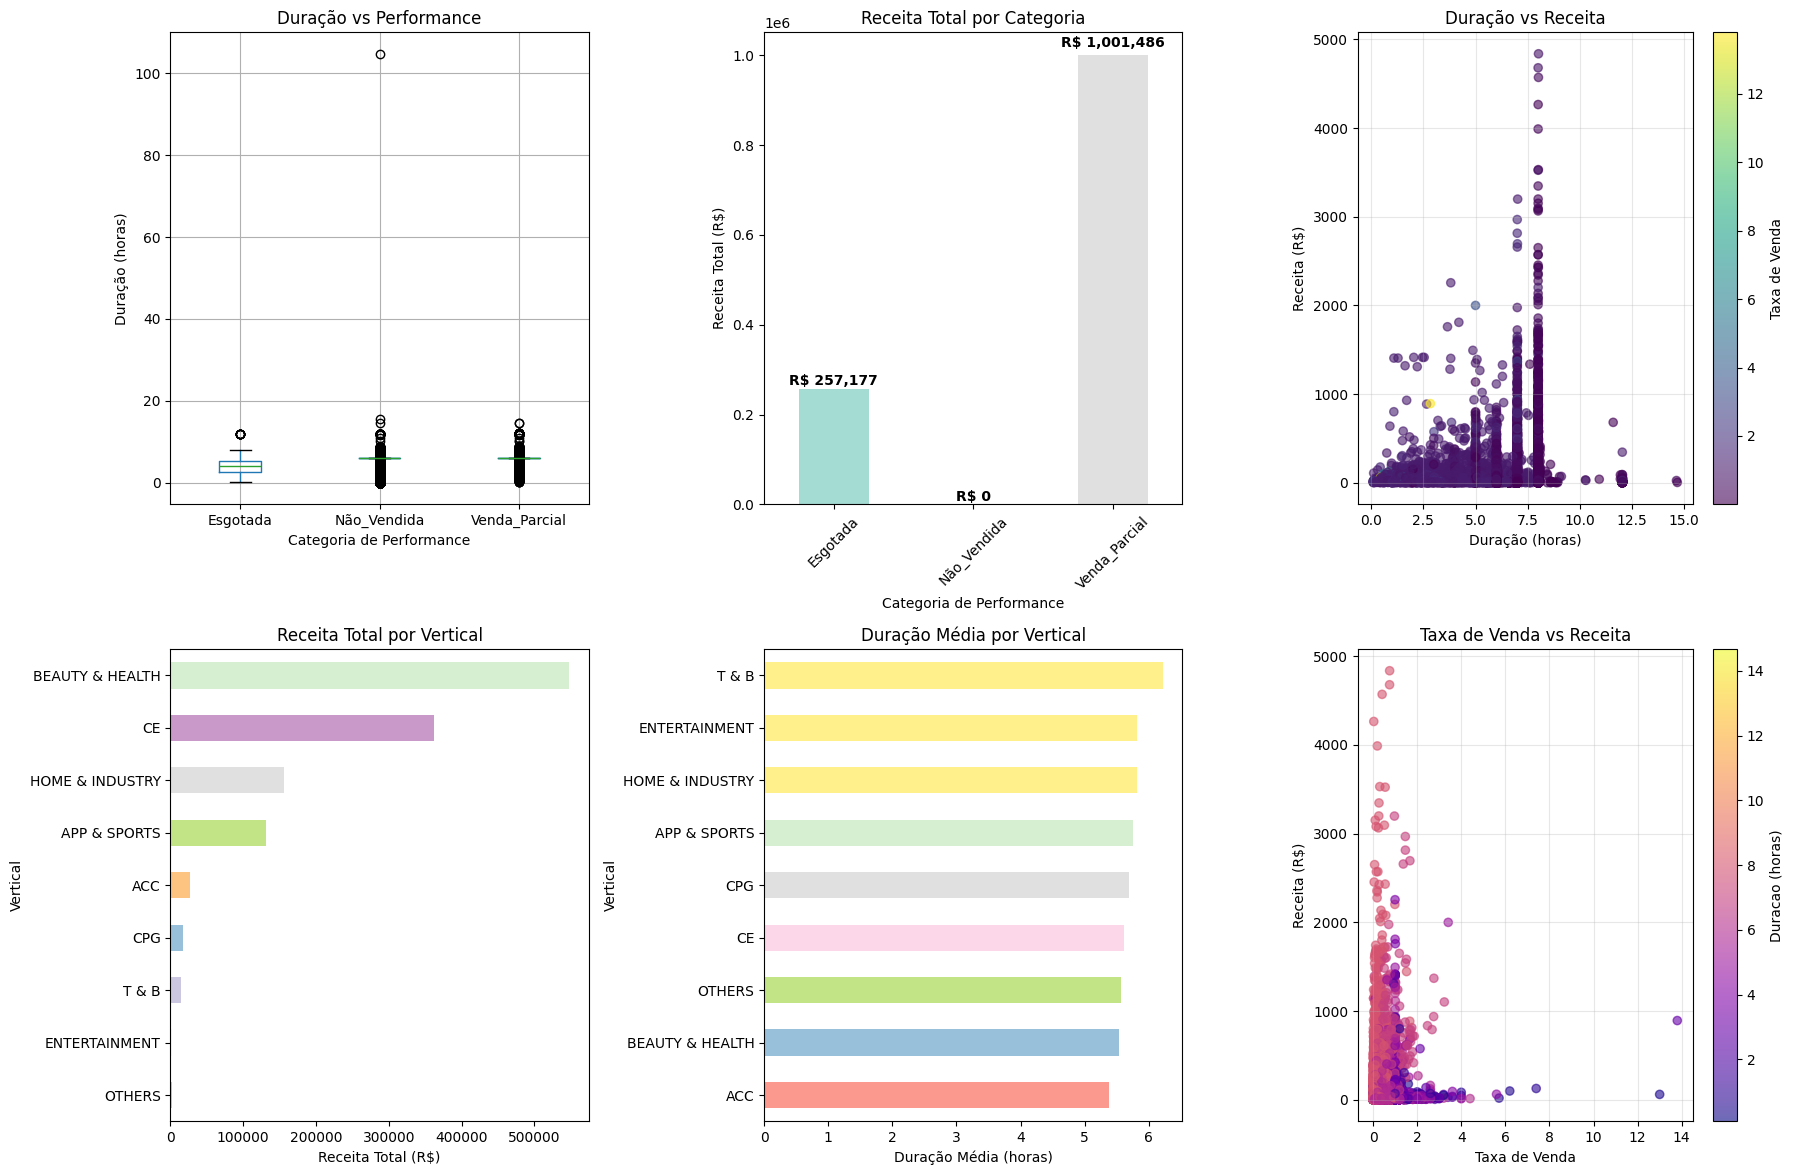


INSIGHTS DE DURAÇÃO E RECEITA

Melhor vertical por receita:
   BEAUTY & HEALTH: R$ 547,427.27

Vertical com maior duração média:
   T & B: 6.2 horas

Vertical mais eficiente (receita/hora):
   BEAUTY & HEALTH: R$ 21.46/hora
\Correlação duração vs receita: 0.121
   Duração e receita tem correlação fraca


In [31]:
_ = analise_duracao_receita(df_tratado)

## Análise da curva simples até esgotar


ANÁLISE DE TEMPO ATÉ ESGOTAR (Curva de Sobrevivência)

Analisando grupo: free_shipping
   Total de produtos: 26658
   Produtos que esgotaram: 1584
   Taxa de esgotamento: 5.9%
   Probabilidade final de não esgotar: 91.8%

Analisando grupo: none
   Total de produtos: 22088
   Produtos que esgotaram: 2678
   Taxa de esgotamento: 12.1%
   Probabilidade final de não esgotar: 85.6%


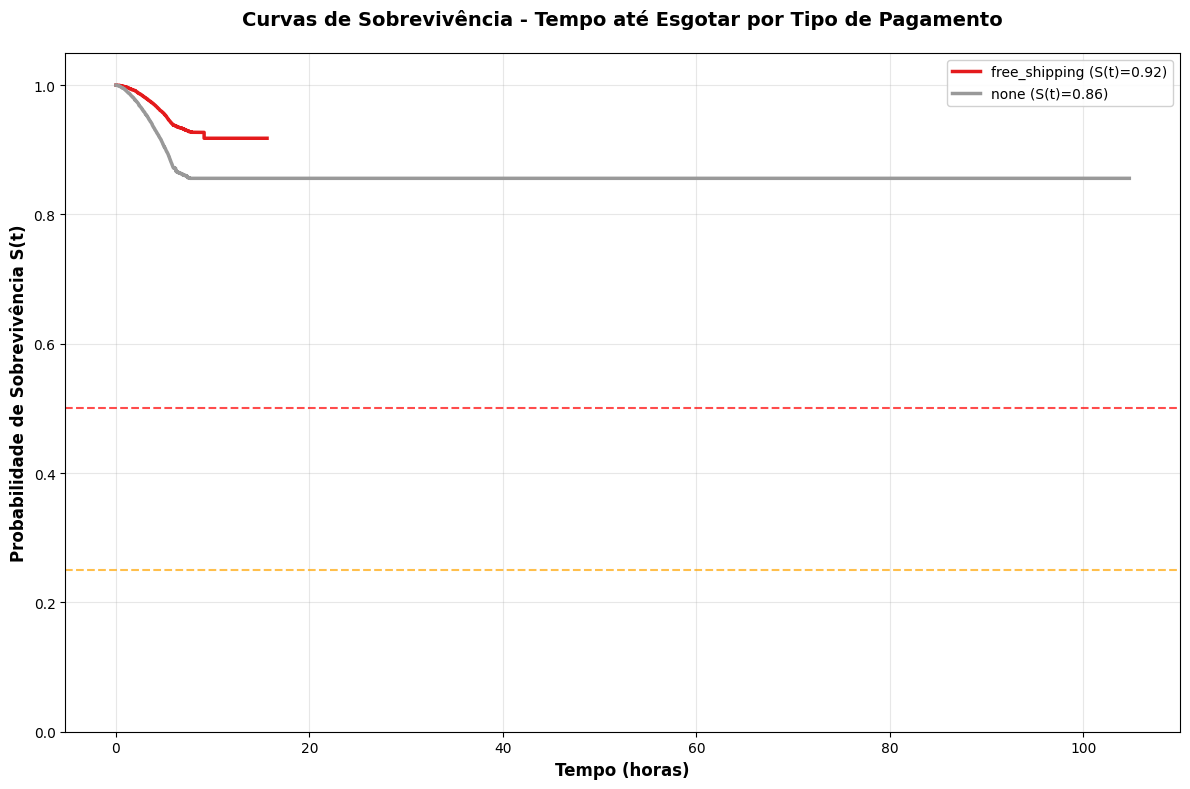

In [32]:
_ = analise_tempo_ate_esgotar(df_tratado)

## Pareto GMV por Vertical


ANÁLISE DE PARETO - CONCENTRAÇÃO DE GMV por VERTICAL
Esta análise identifica concentração de receita usando o princípio 80/20
Top 10% das ofertas vs. % da receita total

RESULTADOS - Top 10% das ofertas por categoria:
--------------------------------------------------------------------------------
CE                   | 8629 ofertas | Top 863 (10.0%) |  83.0% da receita
BEAUTY & HEALTH      | 7150 ofertas | Top 715 (10.0%) |  77.2% da receita
T & B                | 2624 ofertas | Top 263 (10.0%) |  75.5% da receita
HOME & INDUSTRY      | 11011 ofertas | Top 1102 (10.0%) |  66.6% da receita
ENTERTAINMENT        |  525 ofertas | Top 53 (10.1%) |  65.7% da receita
CPG                  | 2714 ofertas | Top 272 (10.0%) |  63.4% da receita
APP & SPORTS         | 13241 ofertas | Top 1325 (10.0%) |  61.2% da receita
ACC                  | 2573 ofertas | Top 258 (10.0%) |  58.3% da receita
OTHERS               |  279 ofertas | Top 28 (10.0%) |  57.2% da receita

INTERPRETAÇÃO:
----------------

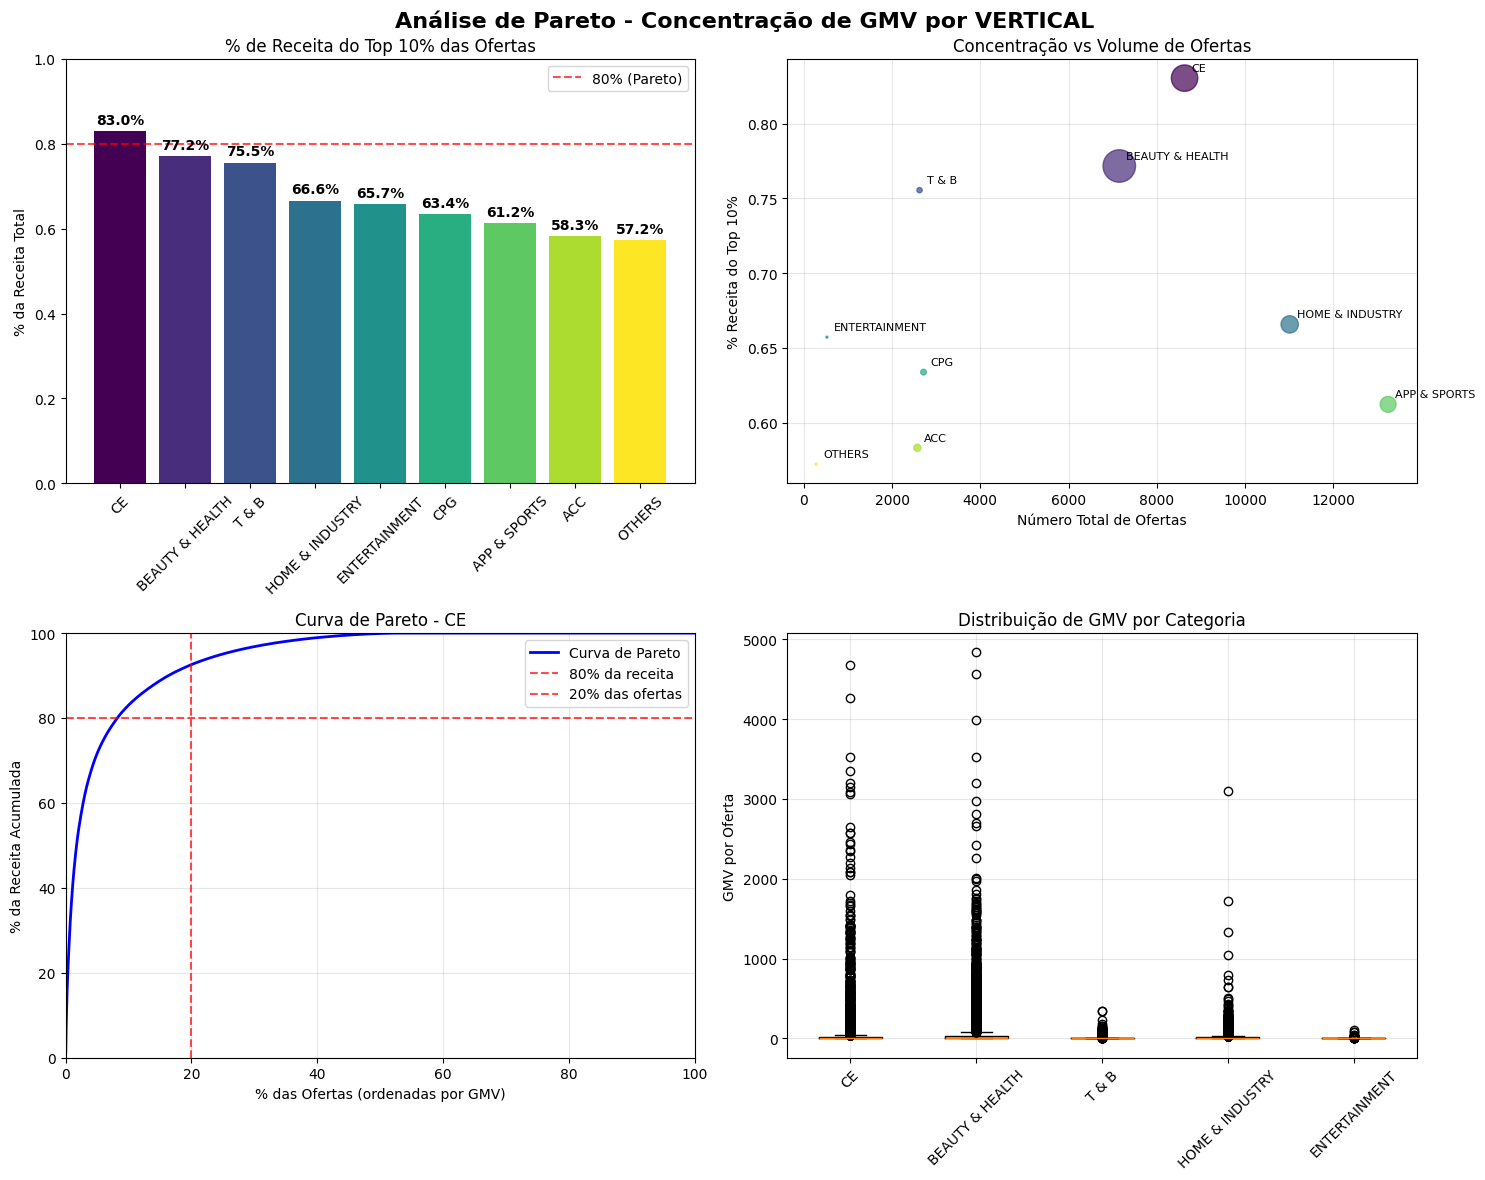

In [33]:
_ = analise_pareto_gmv(df_tratado, nivel='VERTICAL', top_frac=0.1)

## Pareto GMV por Domínio Agregado


ANÁLISE DE PARETO - CONCENTRAÇÃO DE GMV por DOM_DOMAIN_AGG1
Esta análise identifica concentração de receita usando o princípio 80/20
Top 10% das ofertas vs. % da receita total

RESULTADOS - Top 10% das ofertas por categoria:
--------------------------------------------------------------------------------
MOBILE               | 1841 ofertas | Top 185 (10.0%) |  87.2% da receita
BABY                 |  801 ofertas | Top 81 (10.1%) |  86.2% da receita
ELECTRONICS          | 3018 ofertas | Top 302 (10.0%) |  81.9% da receita
MUSICAL INSTRUMENTS  |   27 ofertas | Top  3 (11.1%) |  80.3% da receita
INDUSTRY             | 1199 ofertas | Top 120 (10.0%) |  77.5% da receita
BEAUTY EQUIPMENT     | 1099 ofertas | Top 110 (10.0%) |  75.8% da receita
TOYS AND GAMES       | 1426 ofertas | Top 143 (10.0%) |  73.8% da receita
COMPUTERS            | 3770 ofertas | Top 377 (10.0%) |  71.5% da receita
DRINKS               |   64 ofertas | Top  7 (10.9%) |  70.1% da receita
WHEELS & TIRES       |   36 of

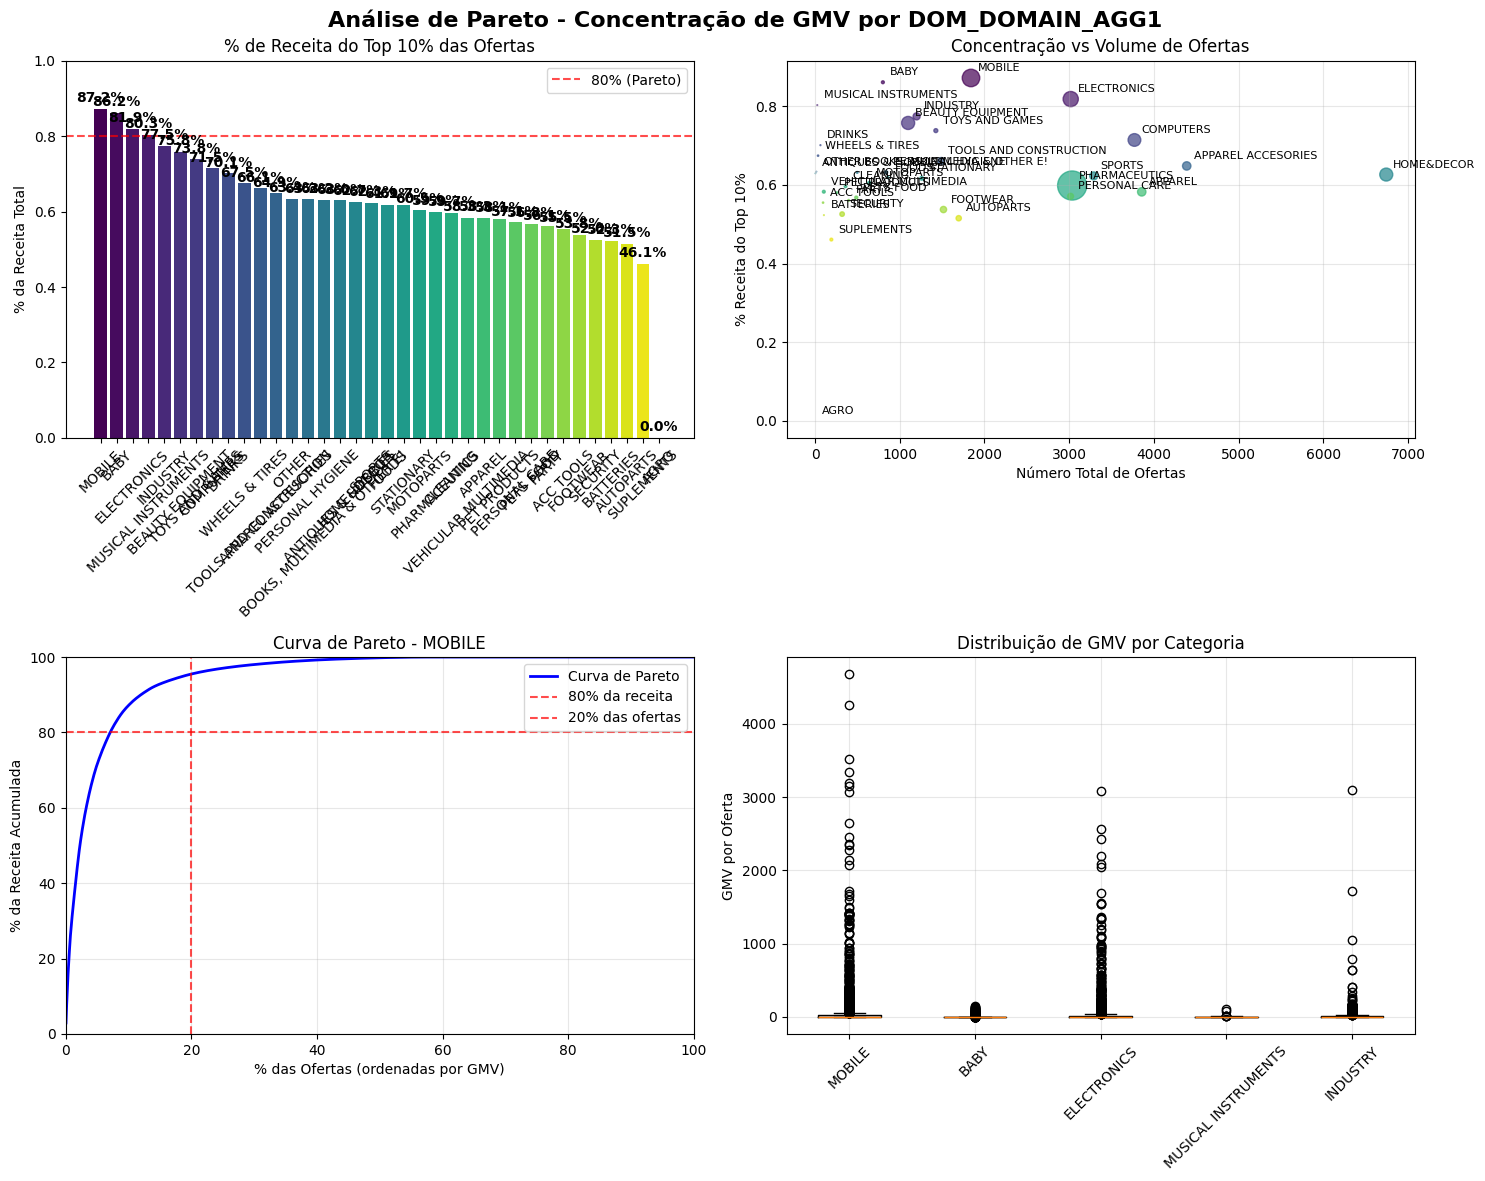

In [34]:
_ = analise_pareto_gmv(df_tratado, nivel='DOM_DOMAIN_AGG1', top_frac=0.1)

## Comparação de frete com Controle


FRETE GRÁTIS: COMPARAÇÃO ESTRATIFICADA (VERTICAL x DURATION_BUCKET)
Esta análise compara performance entre tipos de frete
dentro de grupos homogêneos para evitar viés de composição

TABELA DE COMPARAÇÃO:
--------------------------------------------------------------------------------
                                gmv_per_stock            gmv_total             sell_through        stockout_rate       
SHIPPING_PAYMENT_TYPE           free_shipping   none free_shipping       none free_shipping   none free_shipping   none
VERTICAL        DURATION_BUCKET                                                                                        
ACC             curta(≤2h)              0.386  0.743        197.19     603.41         0.045  0.364         0.045  0.325
                longa(>6h)              1.424  0.473      10698.75    3496.05         0.118  0.191         0.001  0.003
                média(2–6h)             3.743  1.556       8094.05    3730.53         0.365  0.687         0.254  

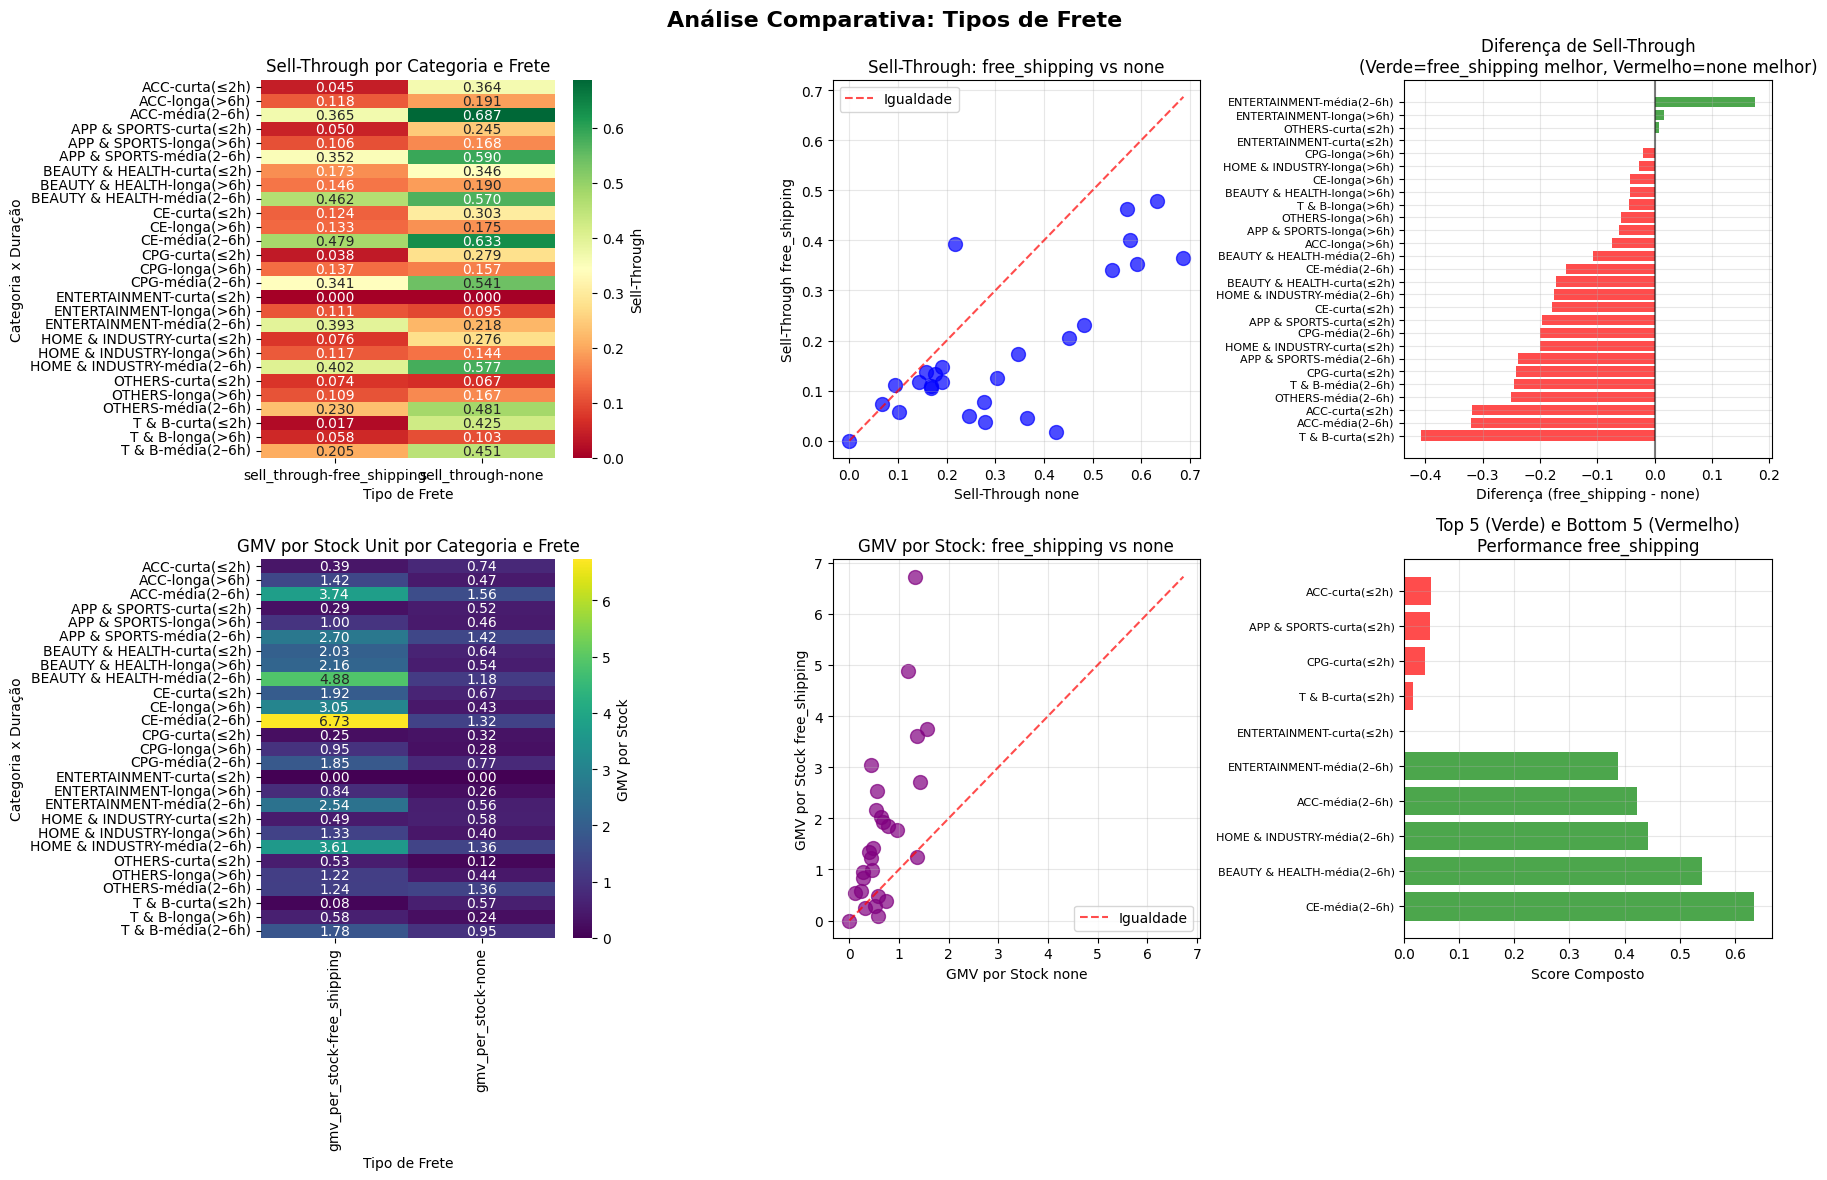


RESUMO EXECUTIVO:

RECOMENDAÇÕES:
• Foque nas categorias onde FREE tem maior vantagem
• Investigue categorias onde PAID performa melhor
• Considere estratégias diferenciadas por categoria
• Monitore mudanças ao longo do tempo


In [35]:
_ = comparacao_frete_controlada(df_tratado)

## KPIs

In [36]:
print("\n" + "="*80)
print("KPIs por VERTICAL")
print("="*80)
kpi_vertical_raw, kpi_vertical = kpi_resumo(df_tratado, group_col='VERTICAL')
print(kpi_vertical.to_string())


KPIs por VERTICAL
                 n_ofertas        GMV  PRICE_PER_UNIT  sell_through_%  stockout_rate_%  pct_oversell_%
VERTICAL                                                                                              
BEAUTY & HEALTH       7150  547427.27            3.07            13.7             11.7             4.2
CE                    8629  362787.94           16.62            12.2             10.6             2.1
HOME & INDUSTRY      11011  155518.68            5.73            11.8              8.7             3.1
APP & SPORTS         13241  131101.36            5.11            10.2              7.0             1.6
ACC                   2573   26819.98            5.20            21.0             10.1             3.4
CPG                   2714   16787.68            2.95            15.0              9.0             3.9
T & B                 2624   14302.78            6.09             6.0              3.6             1.4
ENTERTAINMENT          525    1988.57            5.57 

In [37]:
print("\n" + "="*80)
print("KPIs por DAYPART")
print("="*80)
kpi_daypart_raw, kpi_daypart = kpi_resumo(df_tratado, group_col='DAYPART')
print(kpi_daypart.to_string())


KPIs por DAYPART
           n_ofertas        GMV  PRICE_PER_UNIT  sell_through_%  stockout_rate_%  pct_oversell_%
DAYPART                                                                                         
tarde          20910  772359.71            5.01            10.7              8.4             2.5
manha          14376  259527.15            4.05            13.3              6.4             2.1
noite          13386  218847.40            4.52            23.7             11.8             3.3
madrugada         74    7929.24           57.46             1.0              0.0             0.0



KPIs 2D: VERTICAL x DAYPART

== KPIs 2D: n_ofertas ==
DAYPART          madrugada   manha   noite   tarde
VERTICAL                                          
ACC                    1.0   849.0   796.0   927.0
APP & SPORTS           3.0  4256.0  3765.0  5217.0
BEAUTY & HEALTH        NaN  2078.0  1802.0  3270.0
CE                    63.0  2436.0  2401.0  3729.0
CPG                    NaN   613.0   789.0  1312.0
ENTERTAINMENT          NaN   136.0   148.0   241.0
HOME & INDUSTRY        7.0  3253.0  3000.0  4751.0
OTHERS                 NaN    69.0    68.0   142.0
T & B                  NaN   686.0   617.0  1321.0

== KPIs 2D: GMV ==
DAYPART          madrugada      manha     noite      tarde
VERTICAL                                                  
ACC                   0.00    6022.05   9852.13   10945.80
APP & SPORTS          0.00   31227.86  41548.68   58324.82
BEAUTY & HEALTH        NaN  124875.96  55112.50  367438.81
CE                 7929.24   55230.80  62340.78  237287.12
CPG       

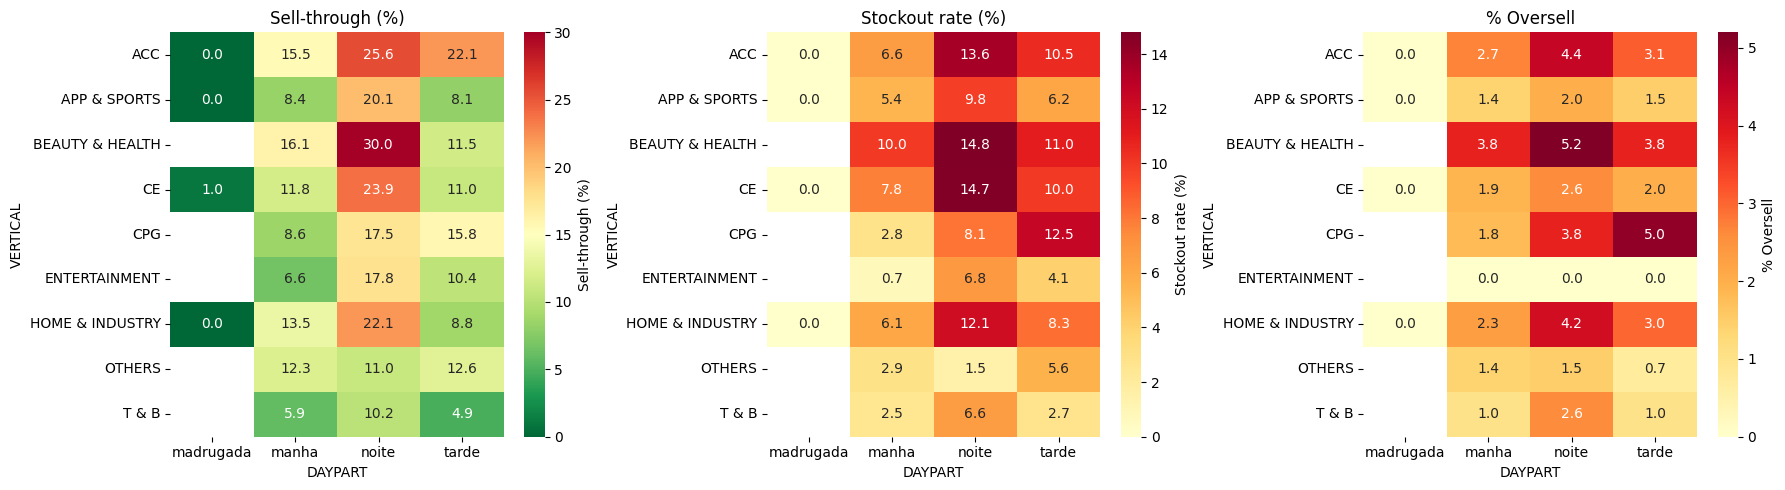

In [38]:
_ = kpi_resumo_2d(df_tratado, rows='VERTICAL', cols='DAYPART')

# Compilado das melhores informações:

A ideia foi construir algumas features para ajudar a analisar melhor nossos dados:

- Temporais: DURATION_HOURS, START_HOUR, WEEKDAY, WEEKEND, DURATION_BUCKET, DAYPART
- Vendas: STOCK_SOLD, SALES_RATE, PERFORMANCE_CATEGORY
- Preços: PRICE_PER_UNIT, VALUE_PER_STOCK_UNIT
- Potencial: POTENTIAL_VALUE, SALES_EFFICIENCY
- Overselling: OVERSELLING_MARGIN, OVERSELL_FLAG, OVERSELL_UNITS, STOCKOUT_FLAG
- Qualidade: STOCK_SOLD_calc, SOLD_UNITS_MISMATCH, SELL_THROUGH, VALUE_PER_STOCK_UNIT

Vimos que a única coluna que tem muito dado nulo era a ORIGIN, as outras eram as que referenciavam as vendas (SOLD_AMOUNT e SOLD_QUANTITY).

Temos diversas variáveis com 10% ou mais de dados considerados outliers, que para modelagem devem ser analisados com mais critério.

Dentro das correlações, podemos ver que entre as variáveis originais a maior correlação pe entre: INVOLVED_STOCK x REMAINING_STOCK_AFTER_END: 0.994.

Dentre nossas features categóricas: temos apenas a nossa oferta de frete grátis, temos algumas features que são Verticais, Domínios agregados e domínios espaçados.

Sendo as maiores verticais:
- APP & Sports
- Home & Industry
- CE

Nos domínios agregados:
- Home & Decor
- APPAREL ACCESORIES 
- APPAREL
- COMPUTERS            
- SPORTS

O que podemos ver que vendas que foram acima do estoque a com maior quantidade de ofertas foi a de Home & Industry, diferente da APP & Sports que predomina como na quantidade total, na que não vendeu e que vendeu até o fim do estoque.


Também tivemos mudanças de posição quando olhamos para Domínio agregado, o que pode nos ajudar tanto a gerenciar ofertas pensadas em Verticais e Domínios separados.


Quando olhamos abaixo, temos uma visão melhor da distribuição das verticais e podemos ver que:
- Beauty & Health foi a vertical que teve menos ofertas que não venderam, além de 11% das ofertas terem estourado o estoque envolvido.
- Home & Industry apesar de ser a nossa Vertical com mais ofertas que venderam acima do estoque, ainda sim possui metade das ofertas que não venderam nenhum item.
- APP & Sports ela é a vertical com maior quantidade de ofertas, mas foi a 3ª que tiveram ofertas que venderam acima do estoque e metade da quantidade de ofertas que não venderam nenhum item.



 MELHOR DIA DA SEMANA (mais esgotadas):
   Thursday: 8.3% esgotadas

 PIOR DIA DA SEMANA (mais não vendidas):
   Saturday: 53.4% não vendidas

 MELHOR VERTICAL TEMPORAL:
   BEAUTY & HEALTH: 28.3% taxa média

 ANÁLISE DE SAZONALIDADE:
   Mês 6: 19.8% taxa média, 1,288 esgotadas
   Mês 7: 21.2% taxa média, 2,363 esgotadas



Melhor dia da semana (mais esgotadas):
   Tuesday: 605 esgotadas

Pior dia da semana (mais não vendidas):
   Saturday: 4,011 não vendidas

Tendencia temporal:
   Início do período: 14.3%
   Fim do período: 19.5%
   Performance melhorou ao longo do tempo


Melhor combinação Vertical + Dia:
   APP & SPORTS + Friday: 2241 ofertas

Top 3 combinações Vertical + Dia:
   1. APP & SPORTS + Friday: 2241 ofertas
   2. APP & SPORTS + Saturday: 2146 ofertas
   3. APP & SPORTS + Thursday: 1927 ofertas

Melhor vertical por receita:
   BEAUTY & HEALTH: R$ 547,427.27

Vertical com maior duração média:
   T & B: 6.2 horas

Vertical mais eficiente (receita/hora):
   BEAUTY & HEALTH: R$ 21.46/hora
Correlação duração vs receita: 0.121
   Duração e receita tem correlação fraca


Duração média das ofertas: 5.7 horas
Duração mediana das ofertas: 6.0 horas
Receita total: R$ 1,258,663.50
Receita média por oferta: R$ 51.21


Melhor vertical por receita:
   BEAUTY & HEALTH: R$ 547,427.27

Vertical com maior duração média:
   T & B: 6.2 horas

Vertical mais eficiente (receita/hora):
   BEAUTY & HEALTH: R$ 21.46/hora
Correlação duração vs receita: 0.121
   Duração e receita tem correlação fraca

Analisando grupo: free_shipping
   Total de produtos: 26658
   Produtos que esgotaram: 1584
   Taxa de esgotamento: 5.9%
   Probabilidade final de não esgotar: 91.8%

Analisando grupo: none
   Total de produtos: 22088
   Produtos que esgotaram: 2678
   Taxa de esgotamento: 12.1%
   Probabilidade final de não esgotar: 85.6%


RESULTADOS - Top 10% das ofertas por categoria:
--------------------------------------------------------------------------------
CE                   | 8629 ofertas | Top 863 (10.0%) |  83.0% da receita
BEAUTY & HEALTH      | 7150 ofertas | Top 715 (10.0%) |  77.2% da receita
T & B                | 2624 ofertas | Top 263 (10.0%) |  75.5% da receita
HOME & INDUSTRY      | 11011 ofertas | Top 1102 (10.0%) |  66.6% da receita
RESULTADOS - Top 10% das ofertas por categoria:
--------------------------------------------------------------------------------
MOBILE               | 1841 ofertas | Top 185 (10.0%) |  87.2% da receita
BABY                 |  801 ofertas | Top 81 (10.1%) |  86.2% da receita
ELECTRONICS          | 3018 ofertas | Top 302 (10.0%) |  81.9% da receita
MUSICAL INSTRUMENTS  |   27 ofertas | Top  3 (11.1%) |  80.3% da receita
INDUSTRY             | 1199 ofertas | Top 120 (10.0%) |  77.5% da receita